In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.fft import fft
from scipy.signal import stft
from scipy.signal import butter, lfilter, resample
from scipy.signal import chirp, get_window, spectrogram
from scipy.signal import periodogram, welch
from scipy.io import loadmat
from scipy import stats

In [32]:
df1=pd.read_csv('Hitarth1.csv', header=None)
cols=['Output1', 'Output2', 'Output3', 'Output4', 'var1', 'var2', 'var3', 'var4']
df1.columns=cols
df1=df1.drop(cols[4:], axis=1)
df1.head()

,Output1,Output2,Output3,Output4
0,326629,299808,484808,603551
1,326461,300024,484918,603586
2,326418,300121,484973,603630
3,326534,300073,485004,603693
4,326699,299861,484936,603683


In [33]:
df2=pd.read_csv('Hitarth2.csv', header=None)
cols=['Output1', 'Output2', 'Output3', 'Output4', 'var1', 'var2', 'var3', 'var4']
df2.columns=cols
df2=df2.drop(cols[4:], axis=1)
df2.head()

,Output1,Output2,Output3,Output4
0,397852,314968,884041,825564
1,397959,314746,883904,825463
2,397850,314715,883795,825325
3,397595,314821,883649,825136
4,397718,315007,883999,825466


In [34]:
df3=pd.read_csv('Hitarth3.csv', header=None)
cols=['Output1', 'Output2', 'Output3', 'Output4', 'var1', 'var2', 'var3', 'var4']
df3.columns=cols
df3=df3.drop(cols[4:], axis=1)
df3.head()

,Output1,Output2,Output3,Output4
0,466142,354088,1129384,977404
1,466374,354159,1129594,977611
2,466498,354107,1129489,977535
3,466309,354043,1129338,977364
4,466128,354061,1129378,977371


In [35]:
final_df1=[]
st_ind=['start zero.png', 'start one.png', 'start two.jpg', 'start three.jpg', 'start four.jpg', 'start five.jpg', 'start six.jpg', 'start seven.jpg', 'start eight.jpg', 'start nine.jpg', 'start animal.jpg']
end_ind=['end zero.png', 'end one.png', 'end two.jpg', 'end three.jpg', 'end four.jpg', 'end five.jpg', 'end six.jpg', 'end seven.jpg', 'end eight.jpg', 'end nine.jpg', 'end animal.jpg']

for a, b in zip(st_ind, end_ind):
    start_idx = df1[df1['Output1'] == a].index
    end_idx = df1[df1['Output1'] == b].index
    temp_df1=[]

    for i, j in zip(start_idx, end_idx):
        row = df1[i+1:j]
        
        temp_df1.append(row)
    merged_df1=pd.concat(temp_df1)
    final_df1.append(merged_df1)
print(final_df1)

[      Output1 Output2 Output3 Output4
13439  362717  298041  698809  714887
13440  362629  298036  698736  714838
13441  363058  298056  699334  714975
13442  363258  298068  699597  715067
13443  363102  298070  699391  715036
...       ...     ...     ...     ...
14598  365395  298845  715122  724151
14599  365121  298836  714811  724052
14600  365481  298856  715302  724160
14601  365824  298863  715731  724281
14602  365754  298858  715633  724283

[1164 rows x 4 columns],       Output1 Output2 Output3 Output4
15629  368240  299800  729476  732770
15630  367784  299748  728879  732540
15631  367694  299608  728716  732209
15632  368238  299677  729480  732525
15633  368484  299789  729846  732840
...       ...     ...     ...     ...
16904  370967  301045  746462  742719
16905  370780  301035  746246  742647
16906  371228  301083  746861  742818
16907  371526  301107  747241  742945
16908  371417  301098  747088  742929

[1280 rows x 4 columns],      Output1 Output2 Output3 Output

In [36]:
final_df2=[]
st_ind=['start zero.png', 'start one.png', 'start two.jpg', 'start three.jpg', 'start four.jpg', 'start five.jpg', 'start six.jpg', 'start seven.jpg', 'start eight.jpg', 'start nine.jpg', 'start animal.jpg']
end_ind=['end zero.png', 'end one.png', 'end two.jpg', 'end three.jpg', 'end four.jpg', 'end five.jpg', 'end six.jpg', 'end seven.jpg', 'end eight.jpg', 'end nine.jpg', 'end animal.jpg']

for a, b in zip(st_ind, end_ind):
    start_idx = df2[df2['Output1'] == a].index
    end_idx = df2[df2['Output1'] == b].index
    temp_df2=[]

    for i, j in zip(start_idx, end_idx):
        row = df2[i+1:j]
        
        temp_df2.append(row)
    merged_df2=pd.concat(temp_df2)
    final_df2.append(merged_df2)
print(final_df2)

[      Output1 Output2  Output3 Output4
12299  433486  329613  1005446  896405
12300  433468  329540  1005380  896342
12301  433133  329578  1004769  895757
12302  433198  329788  1004993  895950
12303  433373  329831  1005356  896281
...       ...     ...      ...     ...
13574  436229  331886  1016711  903559
13575  436318  331836  1016788  903652
13576  436239  331929  1016692  903535
13577  436157  331998  1016608  903439
13578  436178  331987  1016637  903481

[1280 rows x 4 columns],      Output1 Output2 Output3 Output4
8011  423539  324529  965021  870781
8012  423454  324606  965008  870731
8013  423470  324610  965026  870754
8014  423582  324511  965072  870844
8015  423648  324451  965091  870893
...      ...     ...     ...     ...
9218  426351  326156  976544  877921
9219  426461  325960  976678  878043
9220  426546  325751  976779  878138
9221  426441  325896  976672  878034
9222  426346  326120  976566  877933

[1212 rows x 4 columns],       Output1 Output2  Output3 Outp

In [37]:
final_df3=[]
st_ind=['start zero.png', 'start one.png', 'start two.jpg', 'start three.jpg', 'start four.jpg', 'start five.jpg', 'start six.jpg', 'start seven.jpg', 'start eight.jpg', 'start nine.jpg', 'start animal.jpg']
end_ind=['end zero.png', 'end one.png', 'end two.jpg', 'end three.jpg', 'end four.jpg', 'end five.jpg', 'end six.jpg', 'end seven.jpg', 'end eight.jpg', 'end nine.jpg', 'end animal.jpg']

for a, b in zip(st_ind, end_ind):
    start_idx = df3[df3['Output1'] == a].index
    end_idx = df3[df3['Output1'] == b].index
    temp_df3=[]

    for i, j in zip(start_idx, end_idx):
        row = df3[i+1:j]
        
        temp_df3.append(row)
    merged_df3=pd.concat(temp_df3)
    final_df3.append(merged_df3)
print(final_df3)

[      Output1 Output2  Output3  Output4
12171  493377  372190  1207216  1030149
12172  493386  372154  1207134  1030090
12173  493563  372054  1207196  1030168
12174  493766  372066  1207514  1030448
12175  493543  372117  1207350  1030268
...       ...     ...      ...      ...
13446  496404  374245  1214027  1035533
13447  496194  374339  1213906  1035427
13448  496299  374356  1214004  1035533
13449  496609  374280  1214225  1035750
13450  496751  374192  1214298  1035813

[1280 rows x 4 columns],       Output1 Output2  Output3  Output4
21525  512538  384961  1259970  1068602
21526  512139  384989  1259633  1068324
21527  511833  384868  1259086  1067852
21528  512184  385003  1259690  1068354
21529  512523  384978  1260027  1068609
...       ...     ...      ...      ...
22800  514741  386550  1266512  1073179
22801  514626  386556  1266448  1073121
22802  514344  386662  1266299  1073030
22803  514325  386704  1266302  1073047
22804  514501  386661  1266409  1073121

[1280 rows x

In [38]:
st_final_df1=[]
for i in range(len(final_df1)):
    scaler = MinMaxScaler()
    standard_df1=scaler.fit_transform(final_df1[i])
    standard_df1=pd.DataFrame(standard_df1, columns=cols[:4])
    st_final_df1.append(standard_df1)
print(st_final_df1)

[       Output1   Output2   Output3   Output4
0     0.031948  0.053933  0.004295  0.005188
1     0.004653  0.048315  0.000000  0.000000
2     0.137717  0.070787  0.035187  0.014505
3     0.199752  0.084270  0.050662  0.024246
4     0.151365  0.086517  0.038541  0.020963
...        ...       ...       ...       ...
1159  0.862593  0.957303  0.964166  0.986024
1160  0.777605  0.947191  0.945866  0.975543
1161  0.889268  0.969663  0.974757  0.986977
1162  0.995658  0.977528  1.000000  0.999788
1163  0.973945  0.971910  0.994234  1.000000

[1164 rows x 4 columns],        Output1   Output2   Output3   Output4
0     0.142484  0.128085  0.041026  0.052254
1     0.023486  0.093396  0.008799  0.030831
2     0.000000  0.000000  0.000000  0.000000
3     0.141962  0.046031  0.041242  0.029434
4     0.206159  0.120747  0.060999  0.058774
...        ...       ...       ...       ...
1275  0.854123  0.958639  0.957949  0.978949
1276  0.805324  0.951968  0.946289  0.972243
1277  0.922234  0.983989  0.

In [39]:
st_final_df2=[]
for i in range(len(final_df2)):
    scaler = MinMaxScaler()
    standard_df2=scaler.fit_transform(final_df2[i])
    standard_df2=pd.DataFrame(standard_df2, columns=cols[:4])
    st_final_df2.append(standard_df2)
print(st_final_df2)

[       Output1   Output2   Output3   Output4
0     0.110416  0.029543  0.056327  0.082077
1     0.104786  0.000000  0.050836  0.074098
2     0.000000  0.015378  0.000000  0.000000
3     0.020332  0.100364  0.018637  0.024446
4     0.075070  0.117766  0.048839  0.066371
...        ...       ...       ...       ...
1275  0.968408  0.949413  0.993593  0.988220
1276  0.996246  0.929178  1.000000  1.000000
1277  0.971536  0.966815  0.992013  0.985180
1278  0.945887  0.994739  0.985024  0.973021
1279  0.952455  0.990287  0.987437  0.978341

[1280 rows x 4 columns],        Output1   Output2   Output3   Output4
0     0.034361  0.077664  0.001104  0.008624
1     0.007065  0.121315  0.000000  0.001887
2     0.012203  0.123583  0.001529  0.004986
3     0.048170  0.067460  0.005437  0.017114
4     0.069364  0.033447  0.007051  0.023716
...        ...       ...       ...       ...
1207  0.937380  1.000000  0.980036  0.970759
1208  0.972704  0.888889  0.991420  0.987198
1209  1.000000  0.770408  1.

In [40]:
st_final_df3=[]
for i in range(len(final_df3)):
    scaler = MinMaxScaler()
    standard_df3=scaler.fit_transform(final_df3[i])
    standard_df3=pd.DataFrame(standard_df3, columns=cols[:4])
    st_final_df3.append(standard_df3)
print(st_final_df3)

[       Output1   Output2   Output3   Output4
0     0.000000  0.059079  0.011446  0.010309
1     0.002585  0.043440  0.000000  0.000000
2     0.053418  0.000000  0.008654  0.013629
3     0.111717  0.005213  0.053043  0.062555
4     0.047674  0.027368  0.030151  0.031103
...        ...       ...       ...       ...
1275  0.869328  0.951781  0.962172  0.951075
1276  0.809018  0.992615  0.945282  0.932553
1277  0.839173  1.000000  0.958961  0.951075
1278  0.928202  0.966985  0.989810  0.988992
1279  0.968983  0.928758  1.000000  1.000000

[1280 rows x 4 columns],        Output1   Output2   Output3   Output4
0     0.242435  0.050654  0.119041  0.140792
1     0.105227  0.065904  0.073660  0.088605
2     0.000000  0.000000  0.000000  0.000000
3     0.120702  0.073529  0.081336  0.094237
4     0.237276  0.059913  0.126717  0.142106
...        ...       ...       ...       ...
1275  1.000000  0.916122  1.000000  1.000000
1276  0.960454  0.919390  0.991382  0.989112
1277  0.863480  0.977124  0.

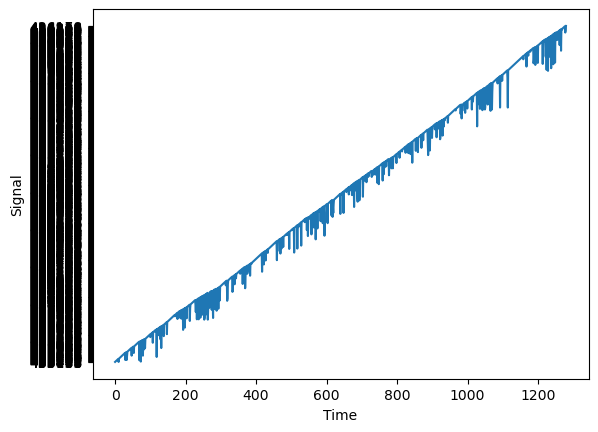

In [41]:

plt.plot(range(len(final_df2[0])), np.array(final_df2[0]['Output1']))
plt.ylabel("Signal")
plt.xlabel('Time')
plt.show()

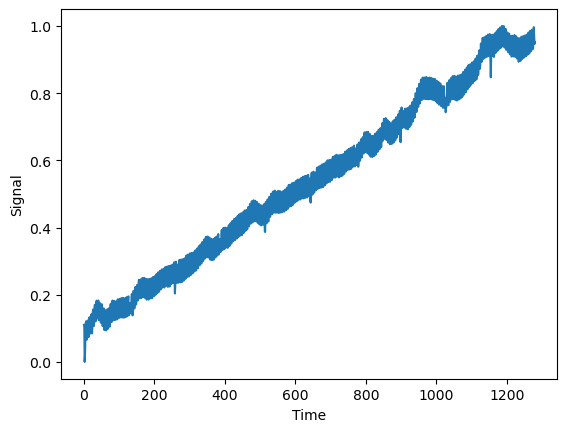

In [42]:

plt.plot(range(len(st_final_df2[0])), np.array(st_final_df2[0]['Output1']))
plt.ylabel("Signal")
plt.xlabel('Time')
plt.show()

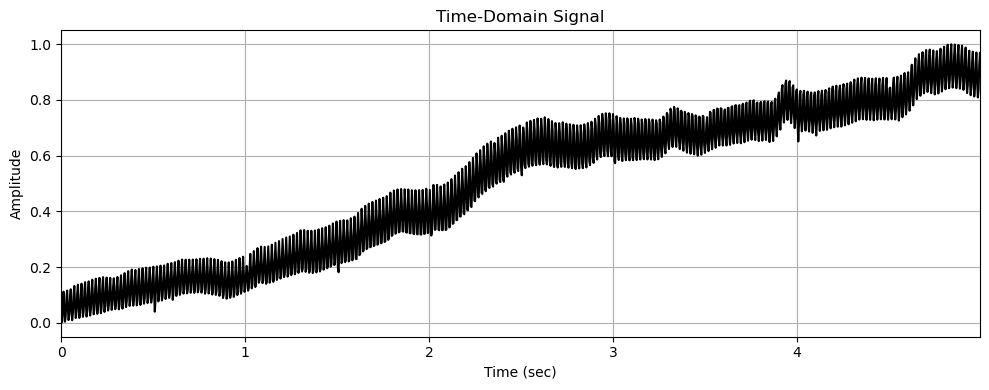

In [43]:
fs = 256 #Hz
t = np.arange(0, 1280) / fs
signal=st_final_df3[0]['Output1'].to_numpy()
plt.figure(figsize=(10, 4))
plt.plot(t, signal, 'k')
plt.title("Time-Domain Signal")
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(0, t[-1])
plt.tight_layout()
plt.show()


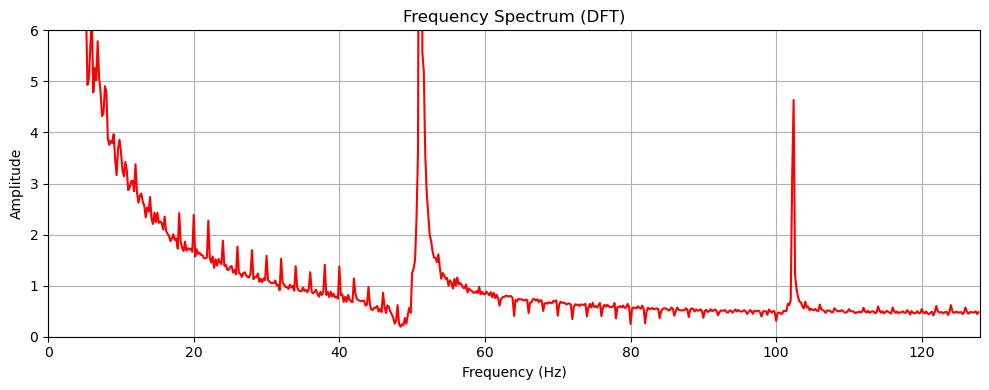

In [44]:
# Plot the frequency spectrum (DFT)
dft = fft(signal)
n = len(signal)
freq = np.fft.fftfreq(n, 1/fs)
positive_freq_indices = np.where(freq >= 0)
plt.figure(figsize=(10, 4))
plt.plot(freq[positive_freq_indices], np.abs(dft[positive_freq_indices]), 'r')
plt.title("Frequency Spectrum (DFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(0, fs/2)
plt.ylim(0, 6)
plt.tight_layout()
plt.show()

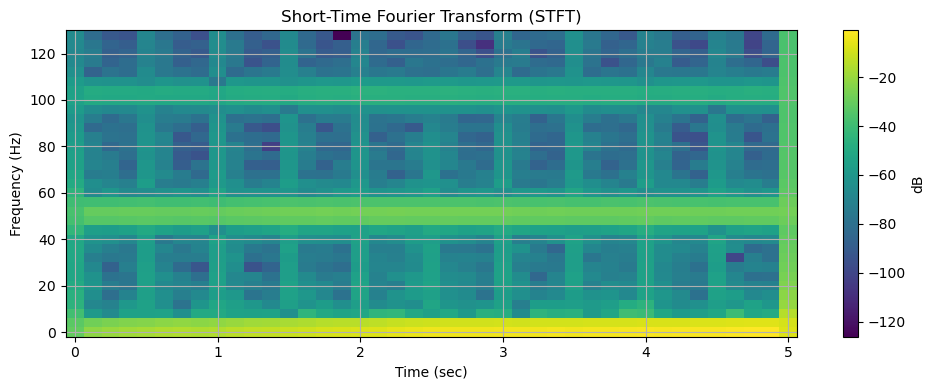

In [45]:
# Plot the STFT
f, t, Zxx = stft(signal, fs=fs, nperseg=64)  # You can adjust nperseg for desired time and frequency resolution
plt.figure(figsize=(10, 4))
plt.pcolormesh(t, f, 20 * np.log10(np.abs(Zxx)))
plt.title("Short-Time Fourier Transform (STFT)")
plt.xlabel("Time (sec)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="dB")
plt.grid(True)
plt.tight_layout()
plt.show()

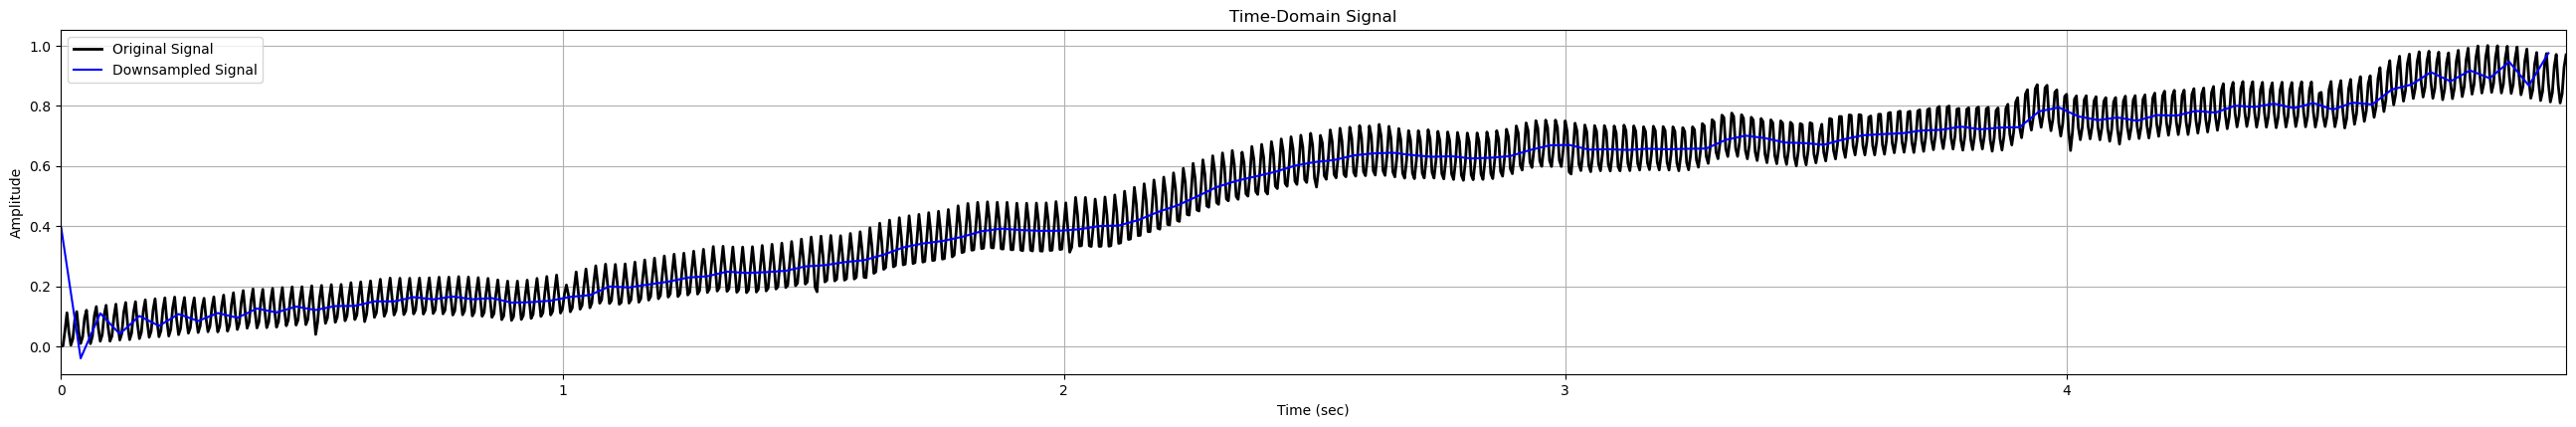

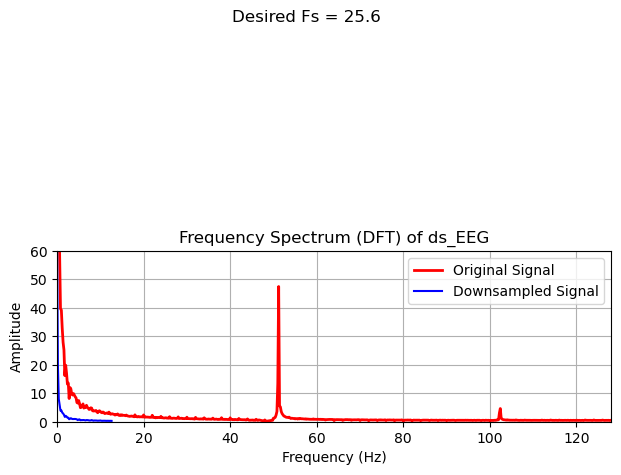

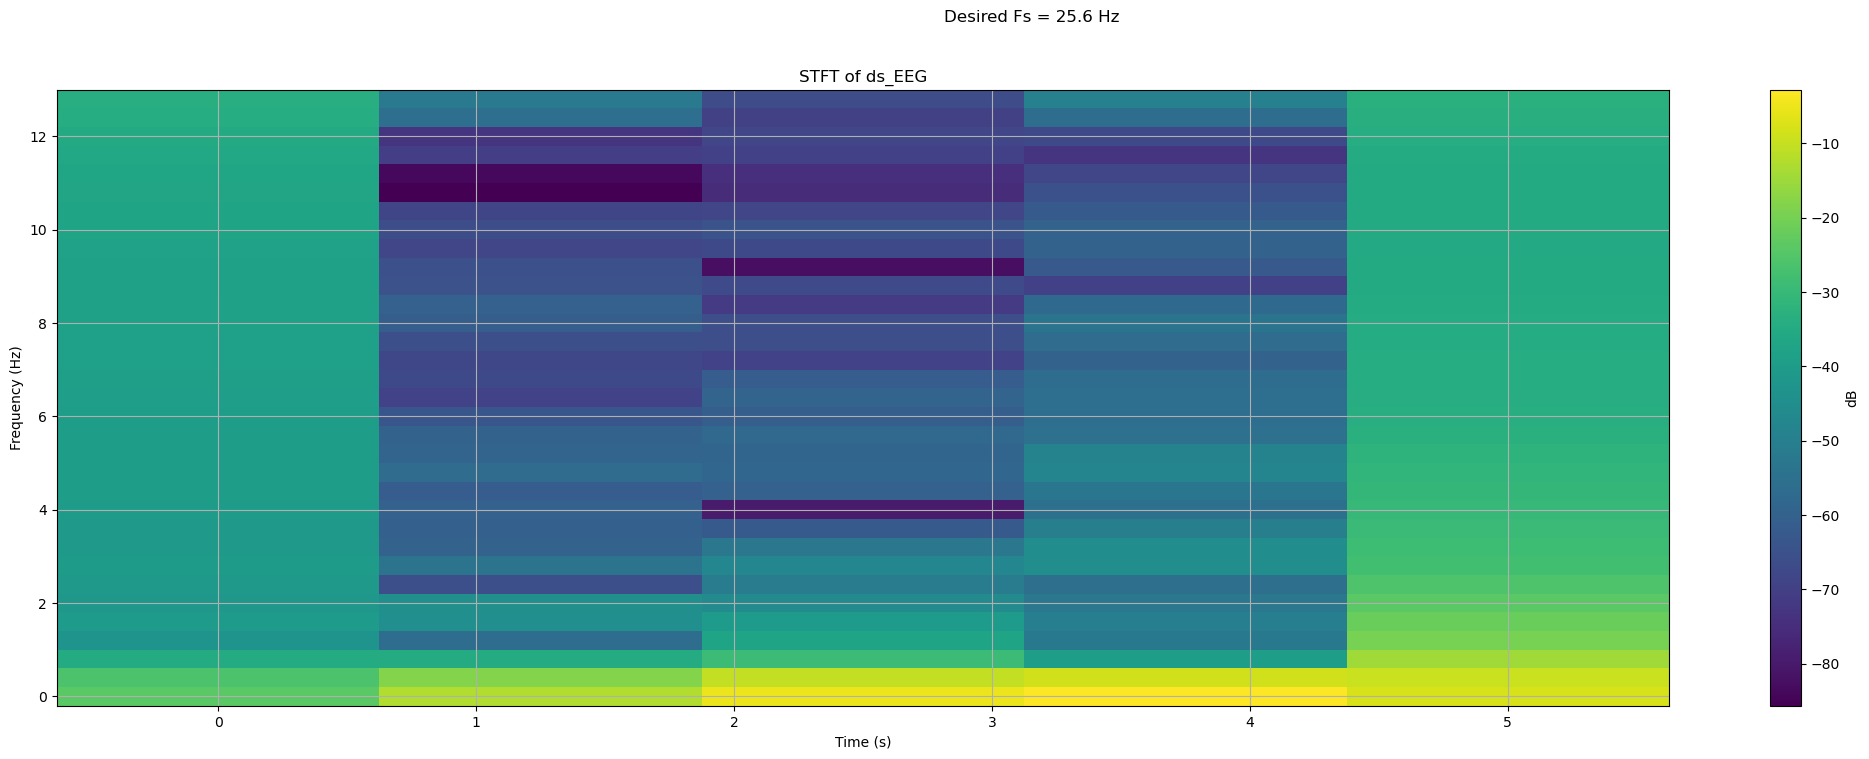

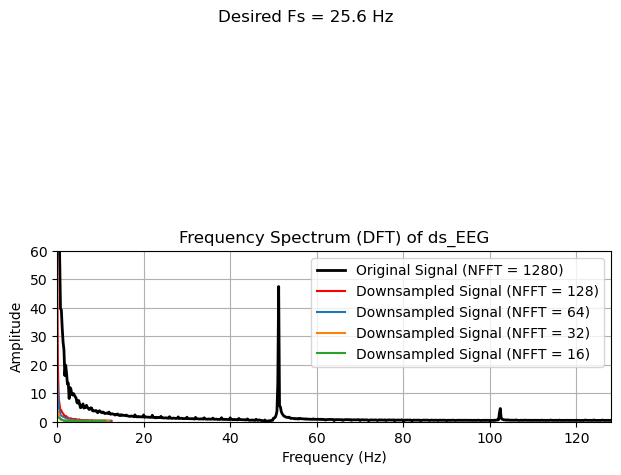

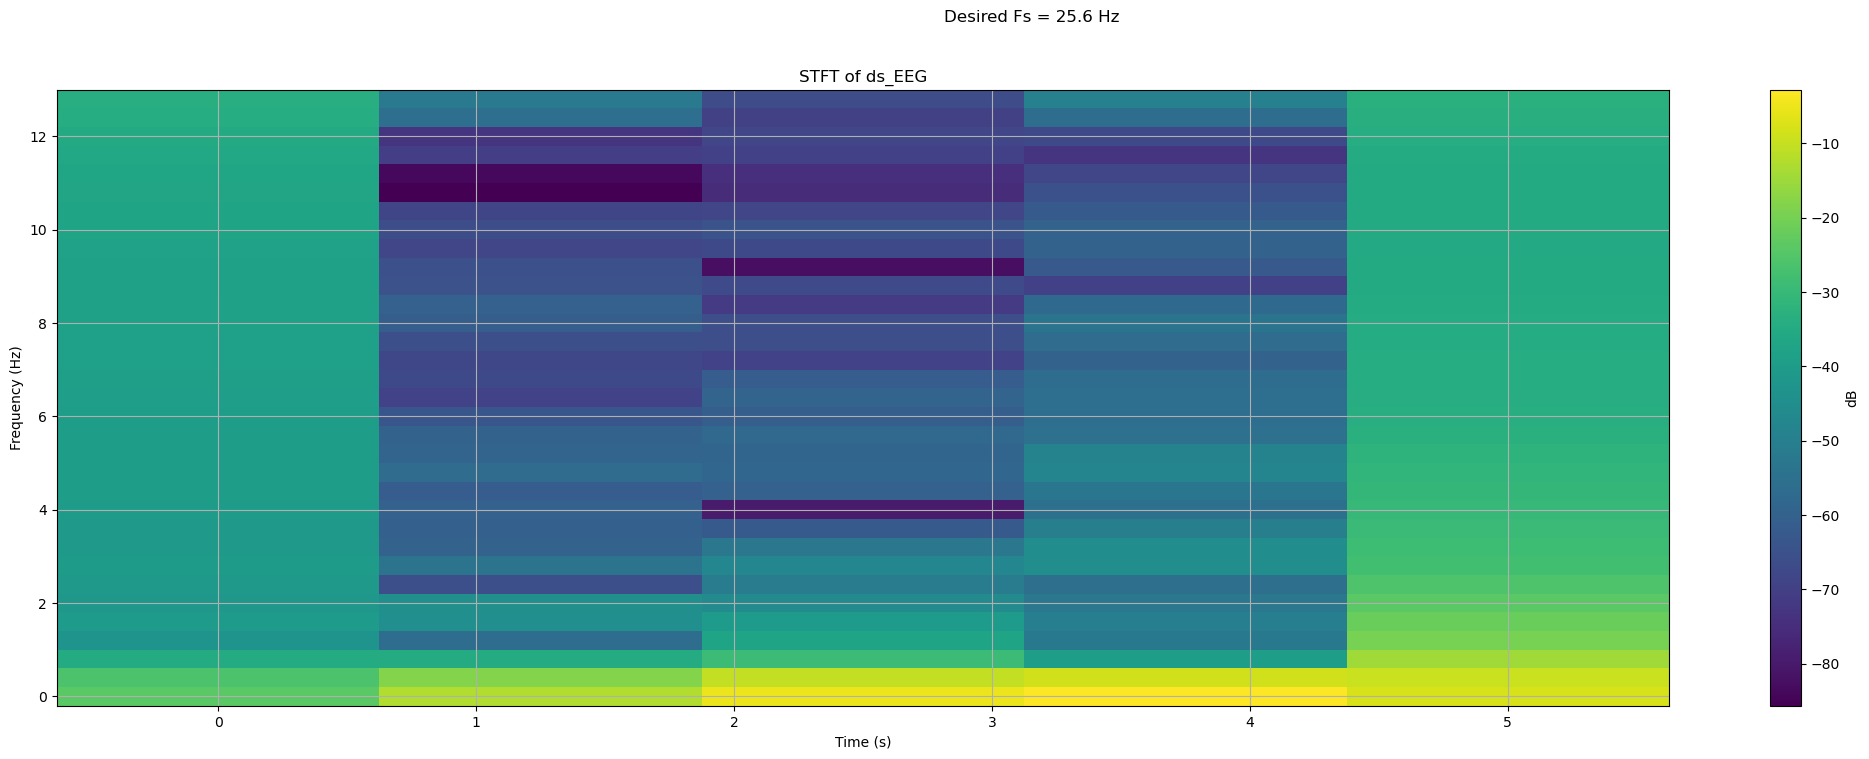

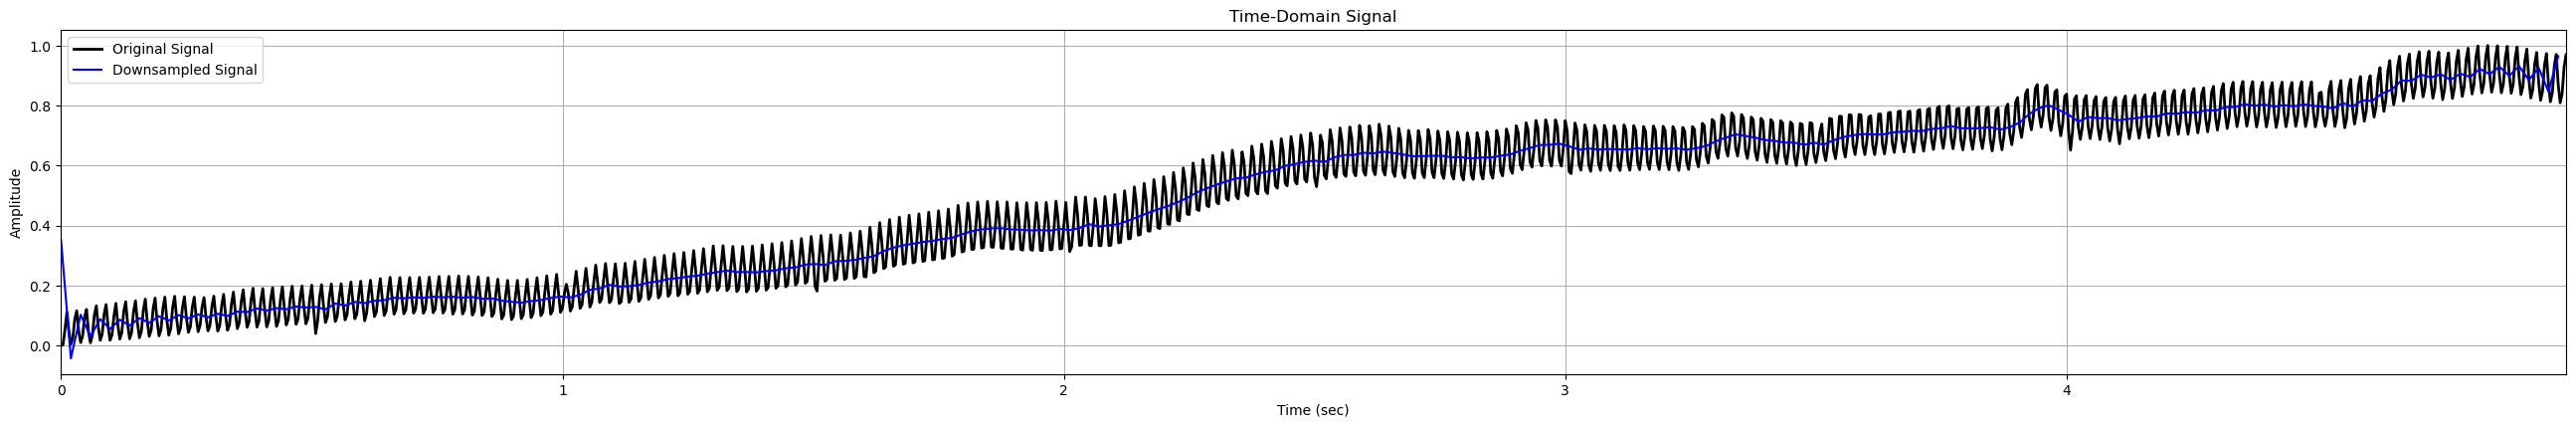

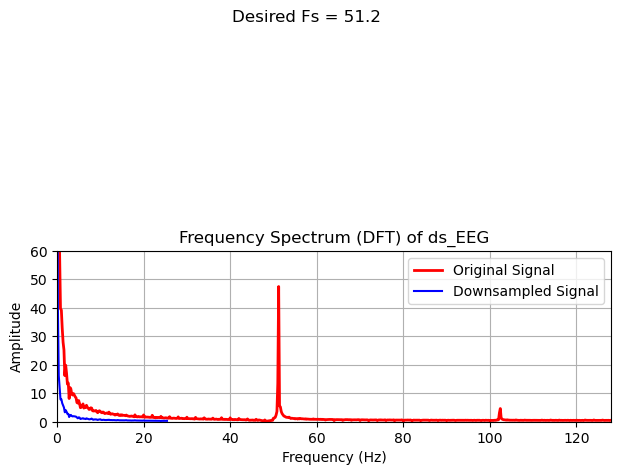

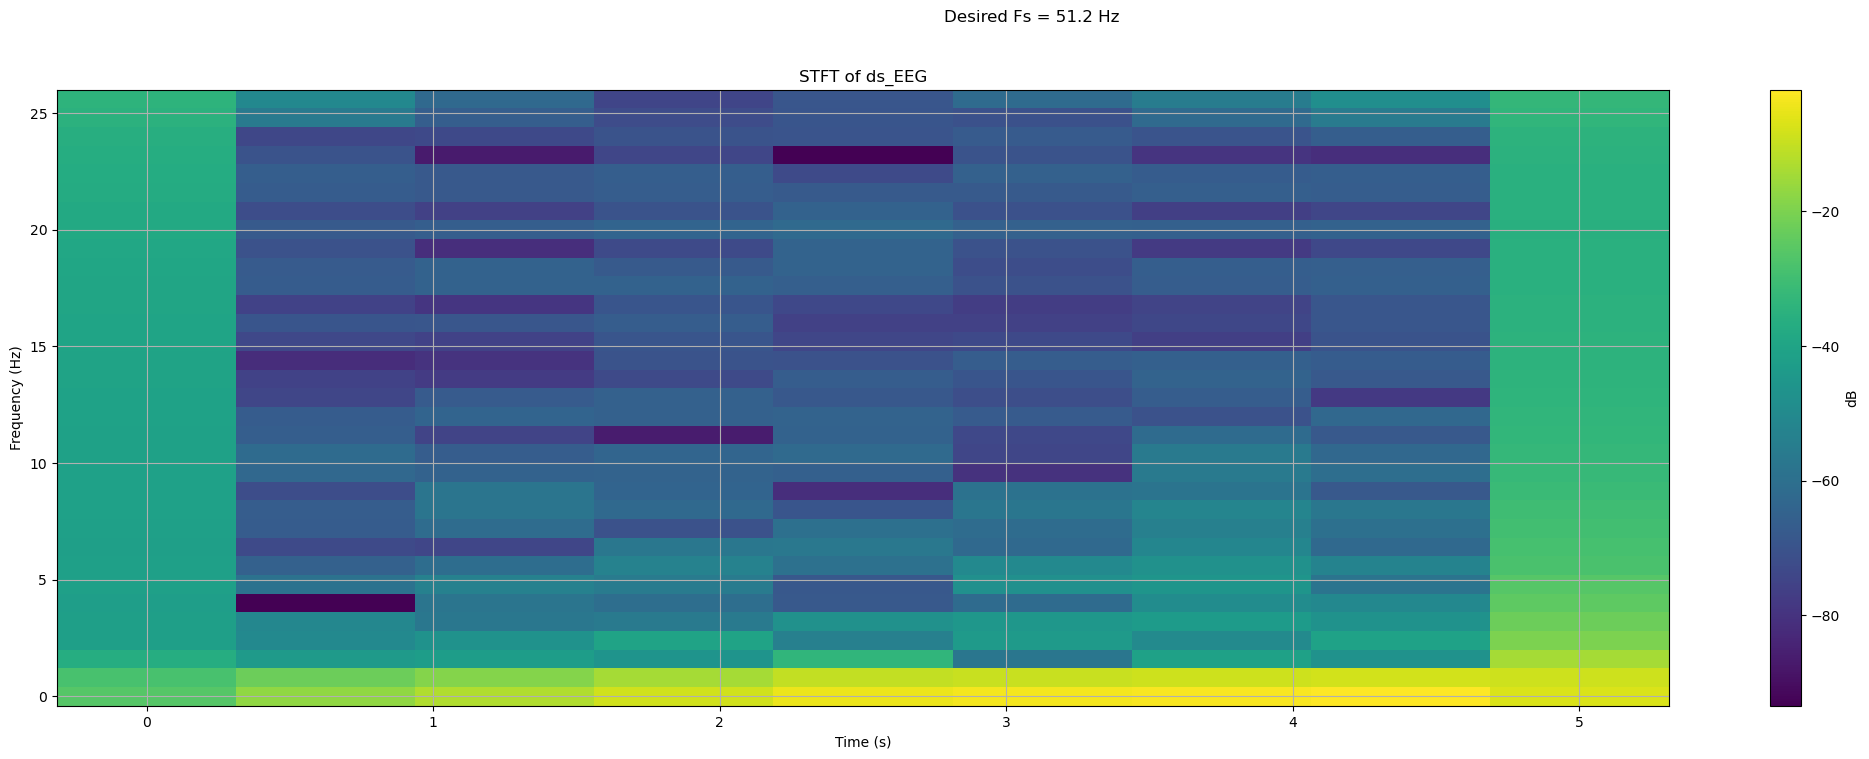

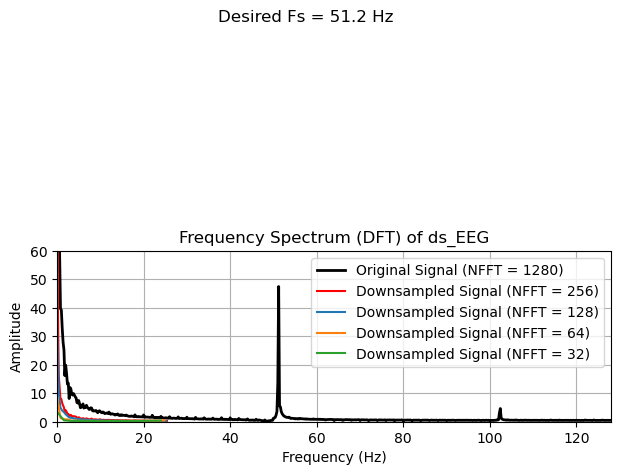

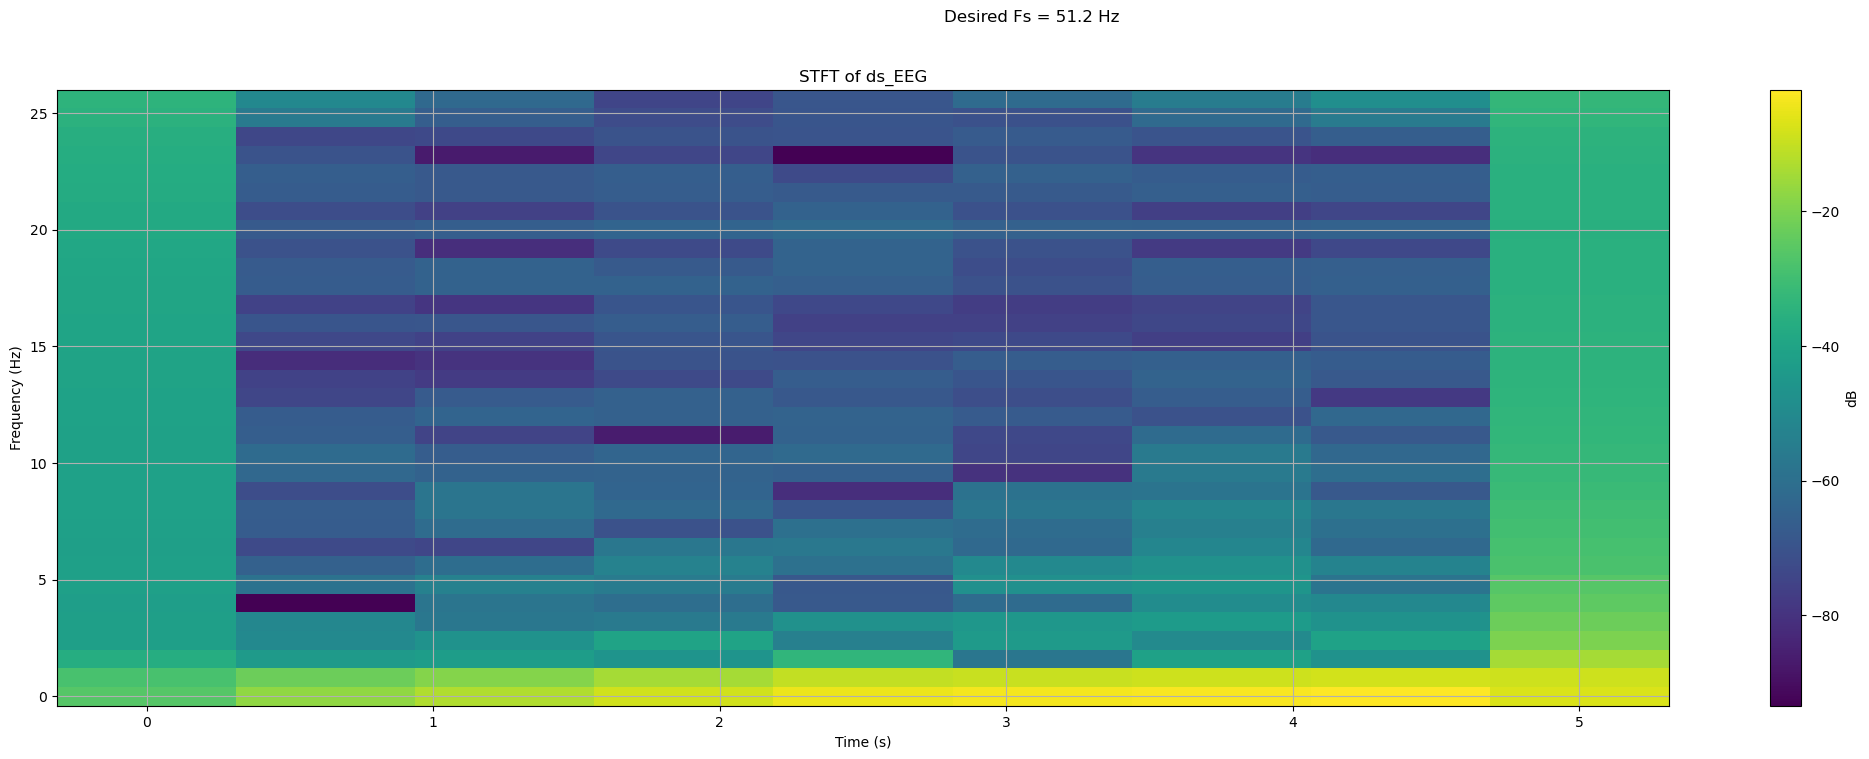

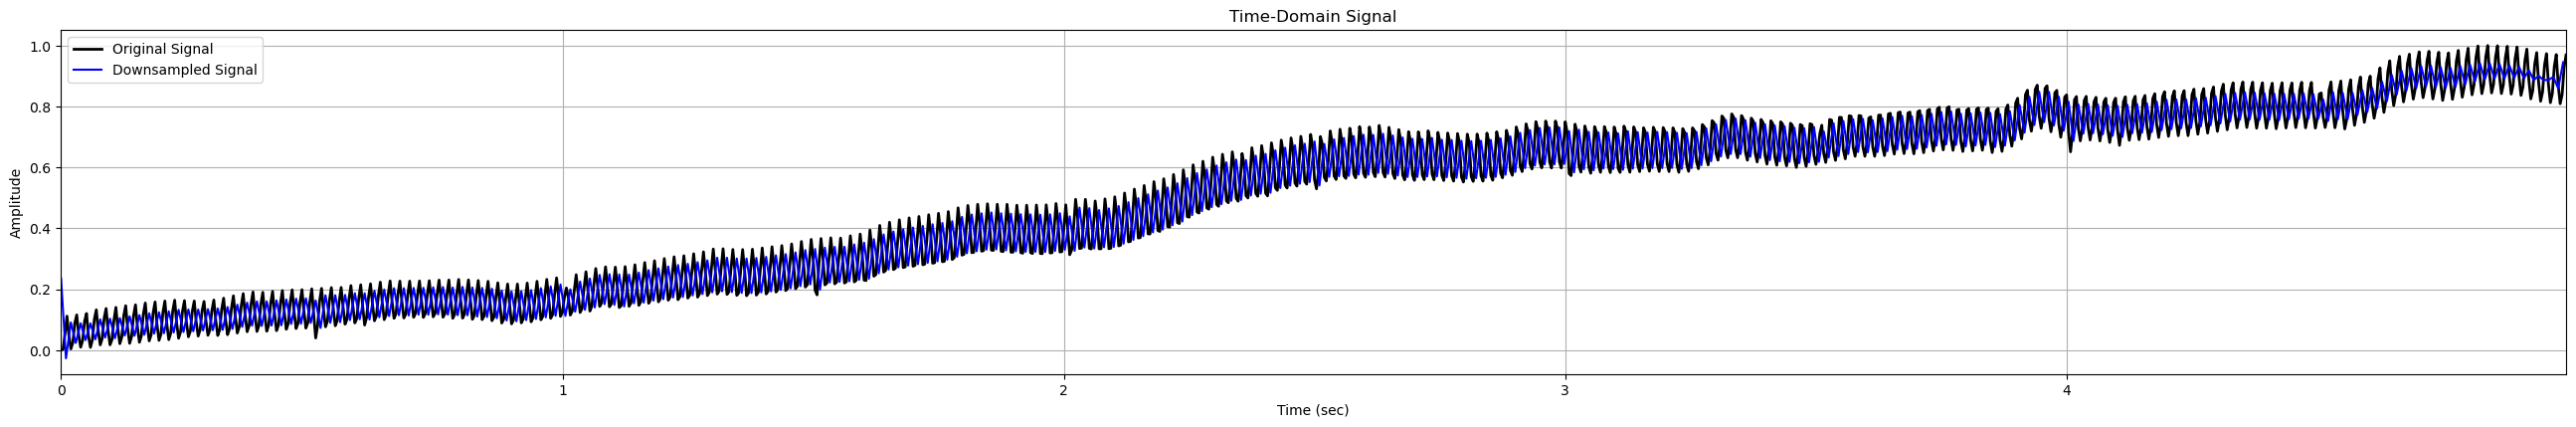

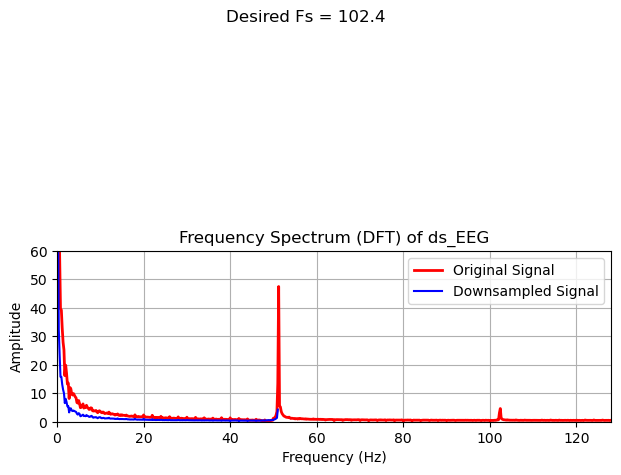

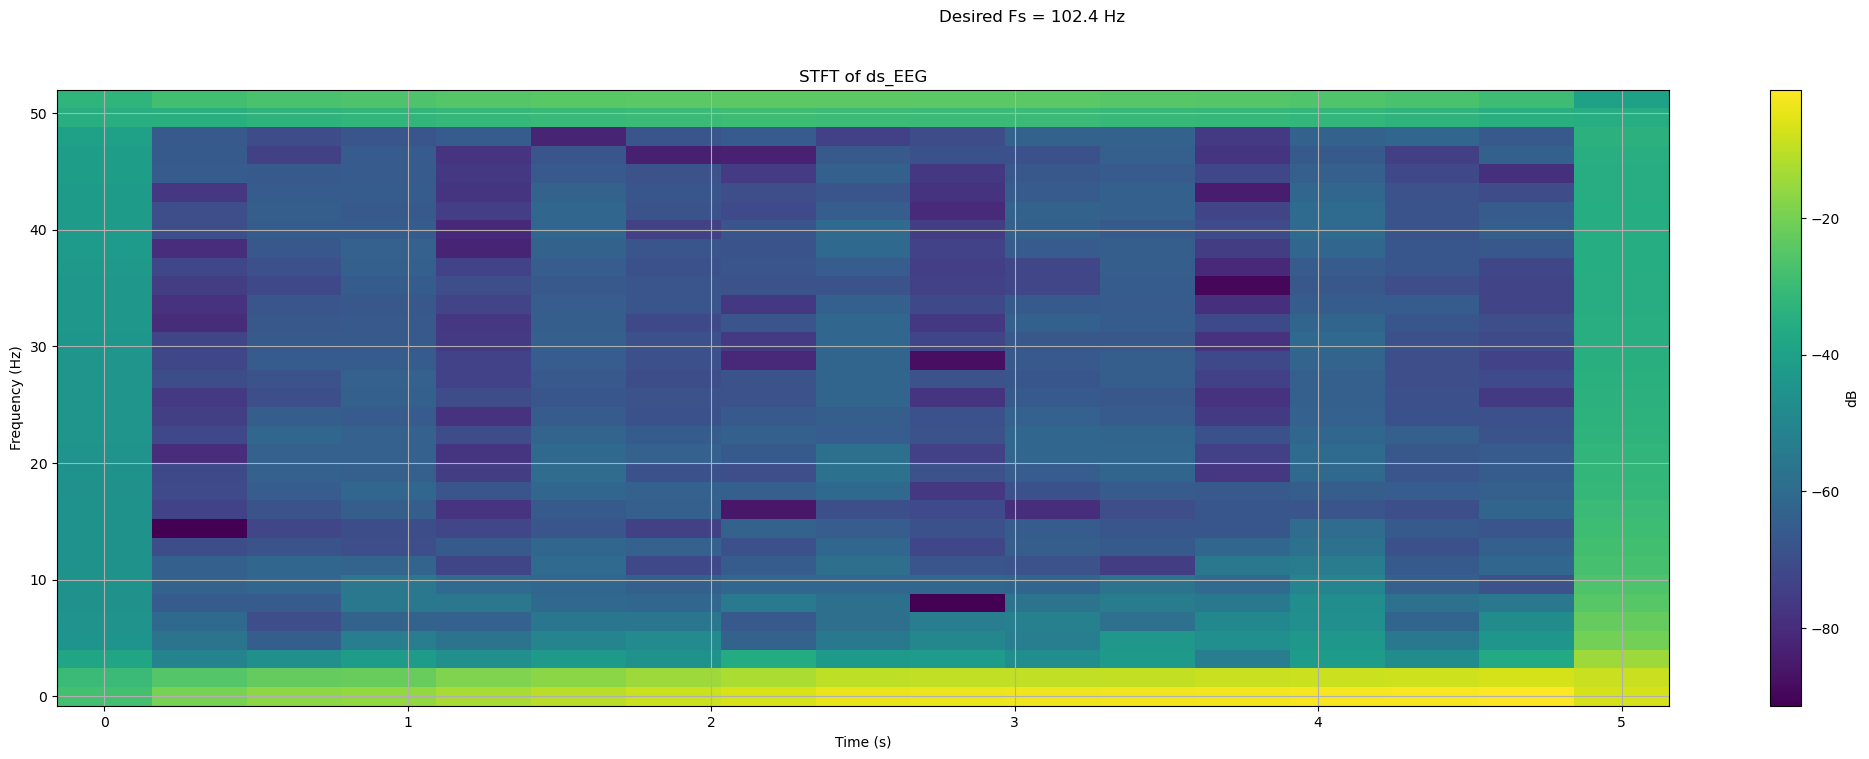

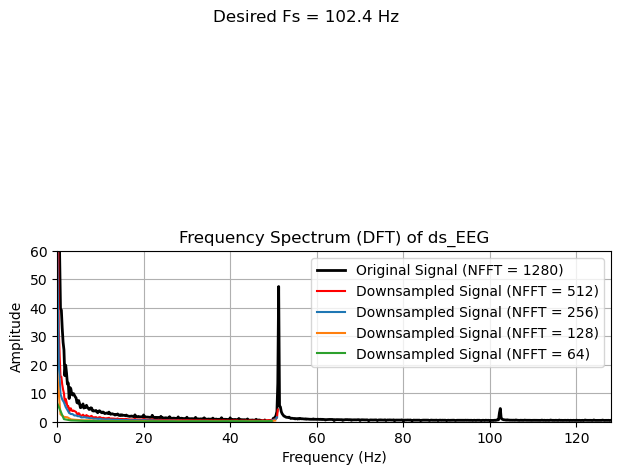

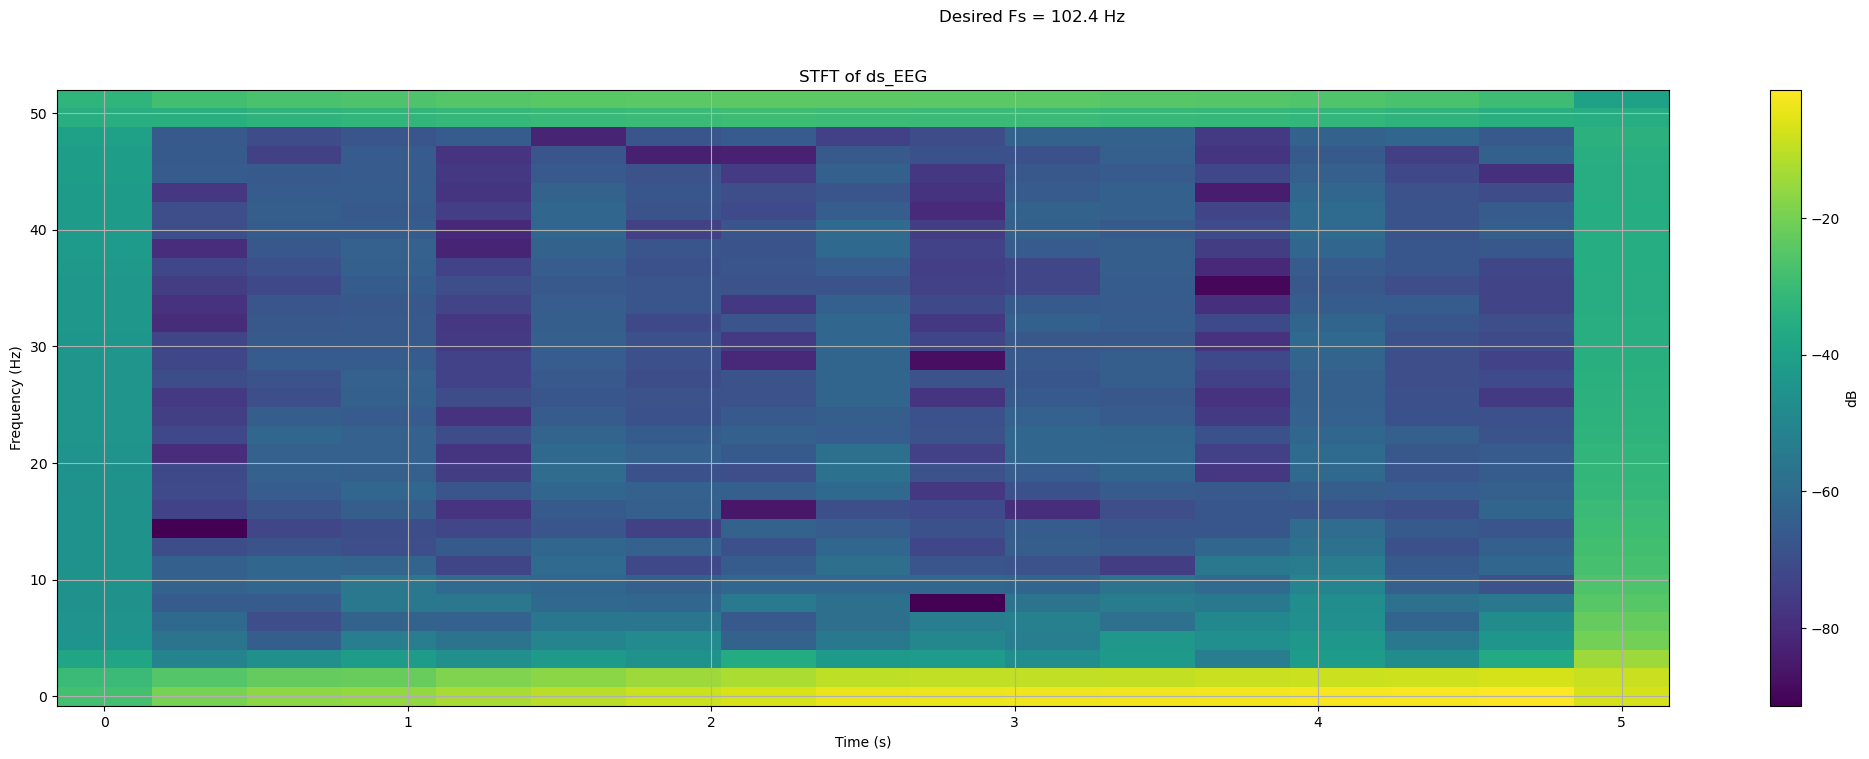

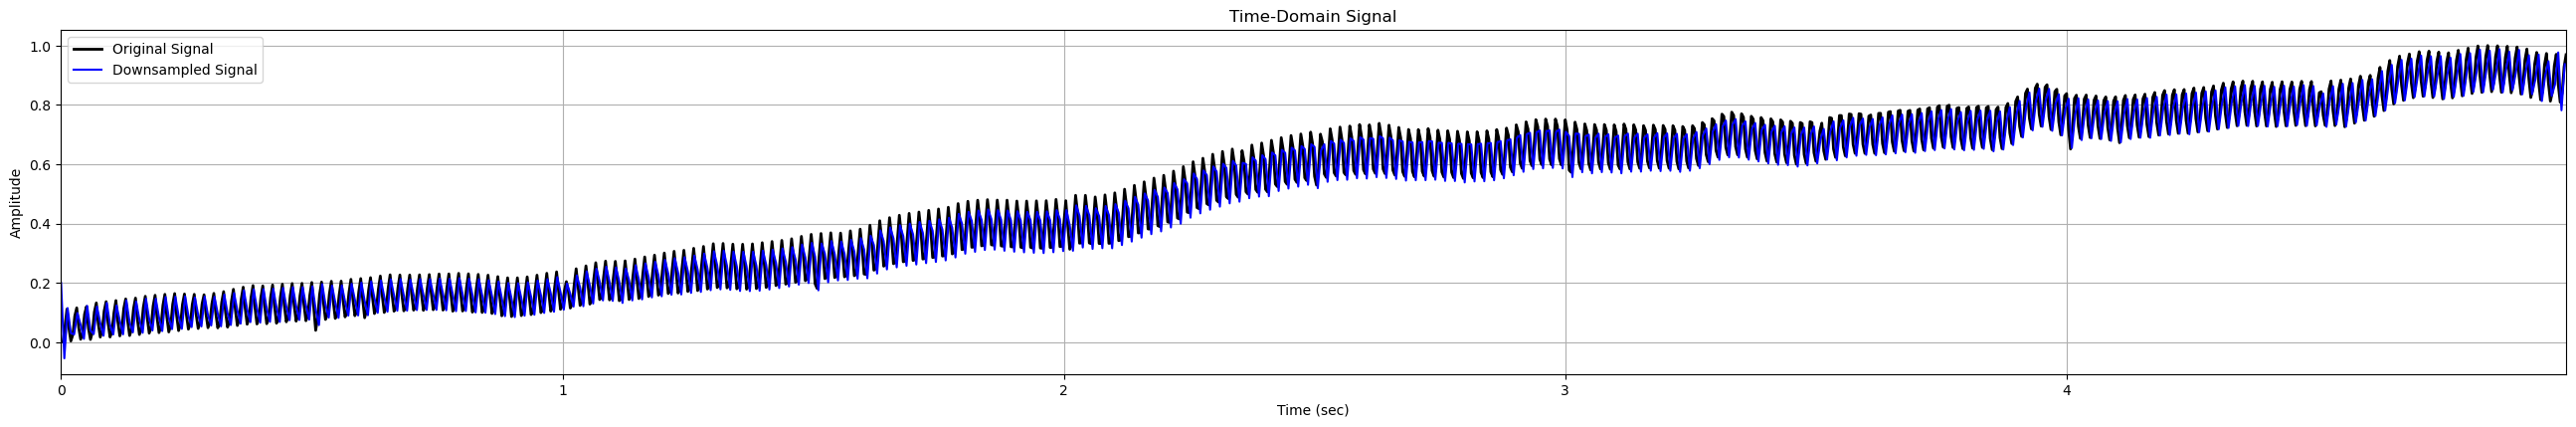

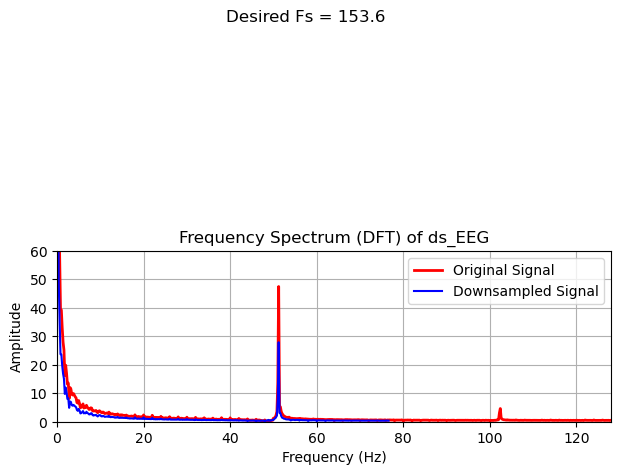

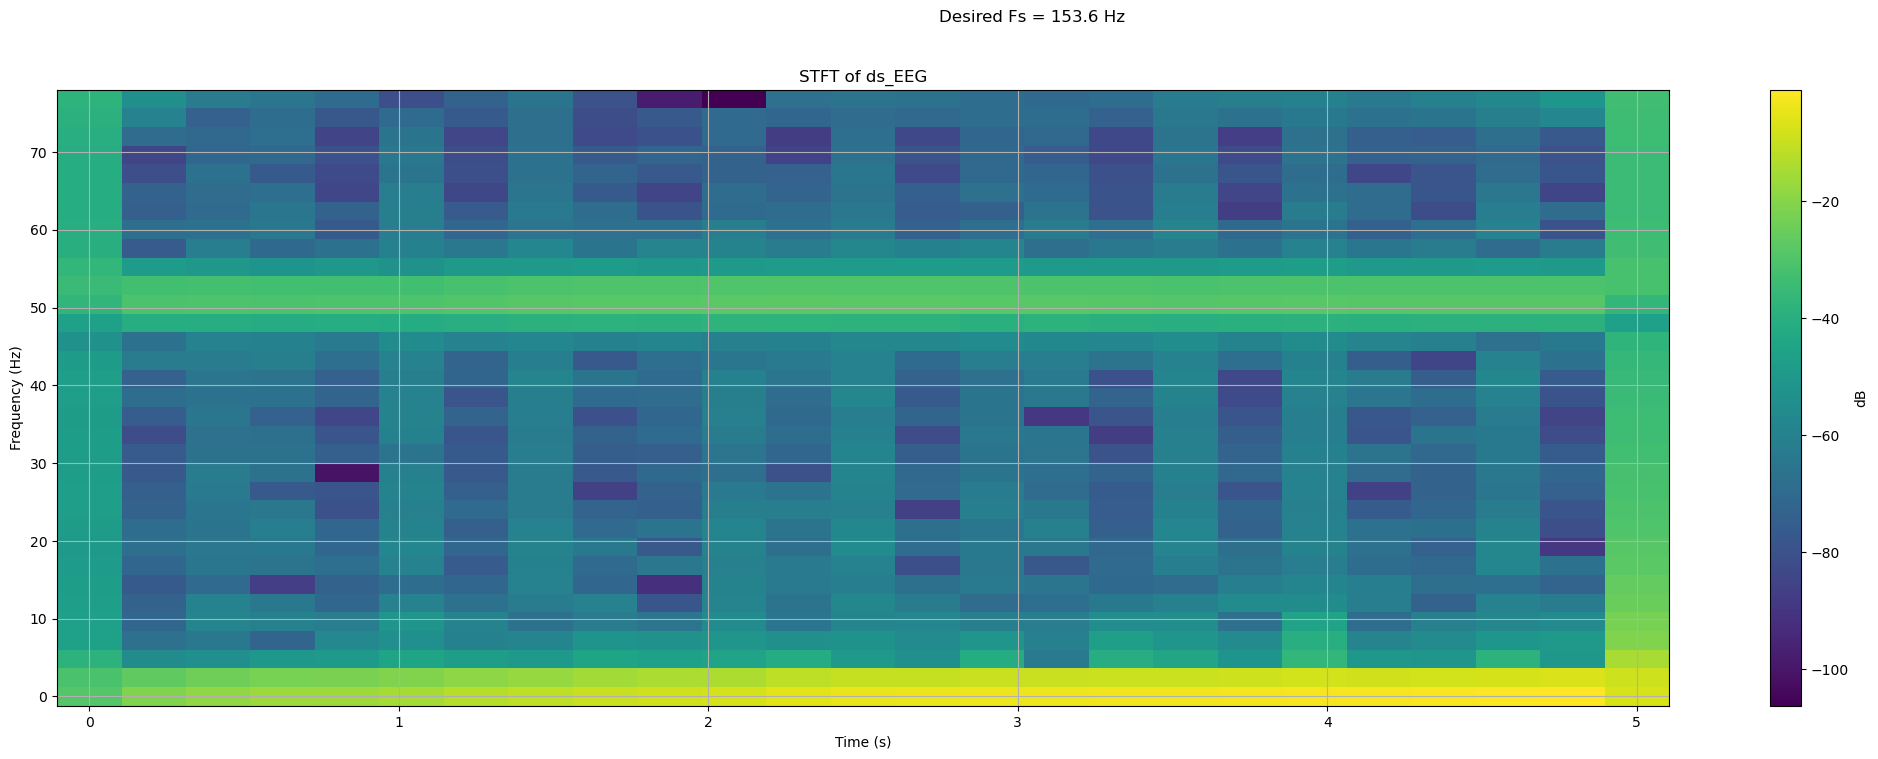

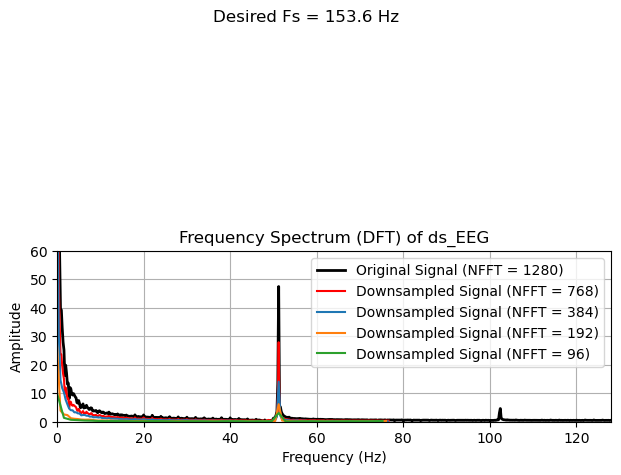

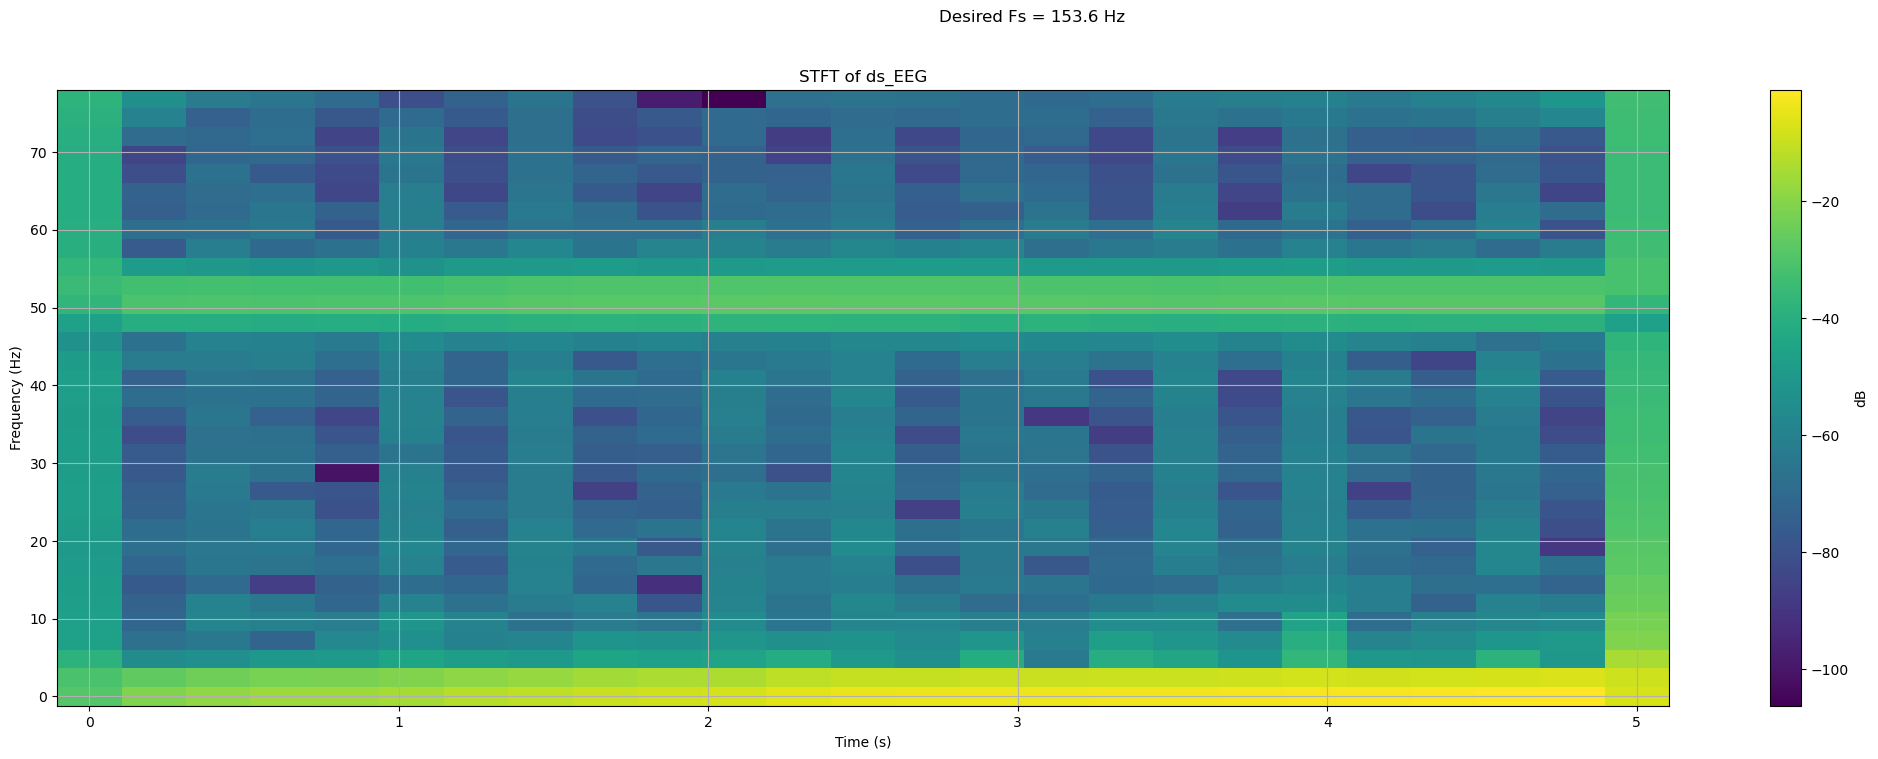

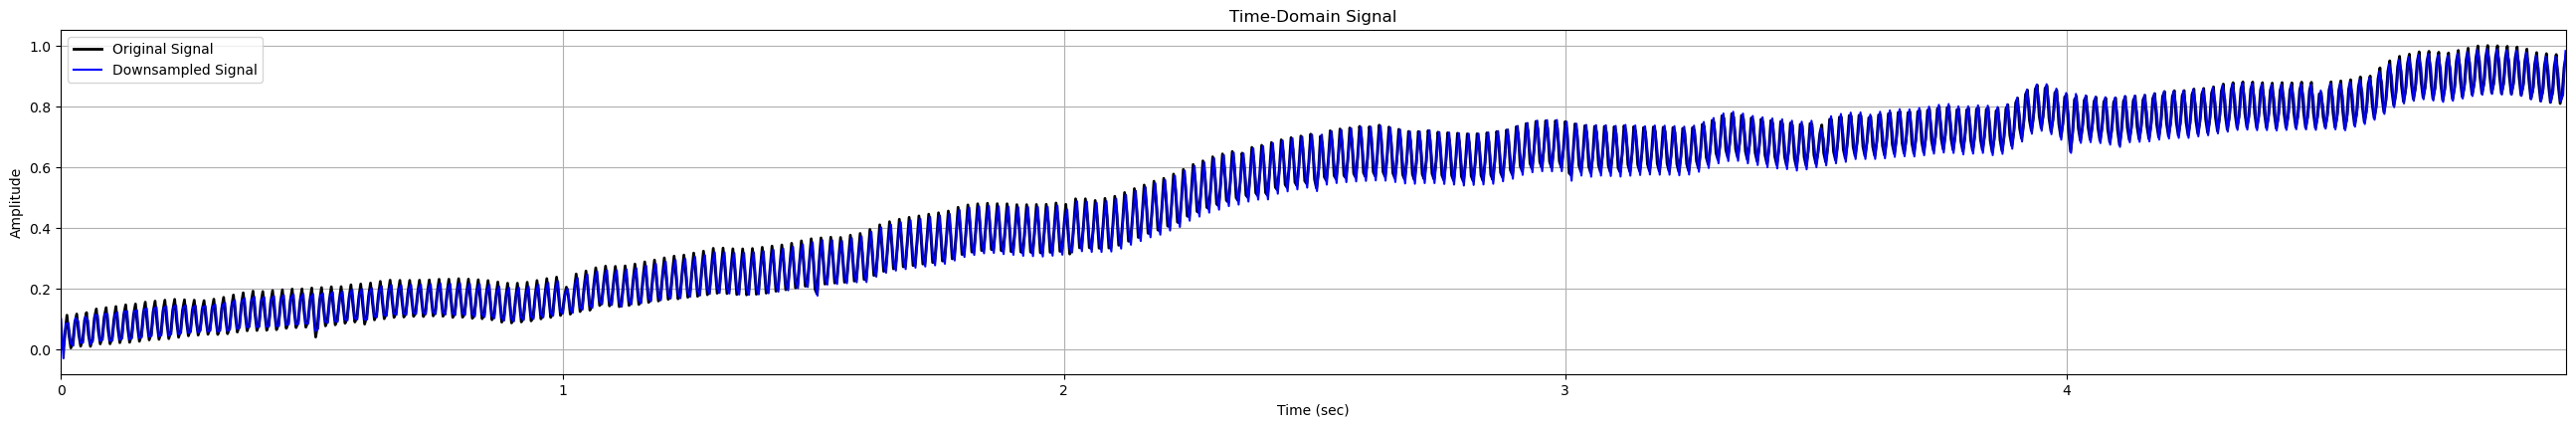

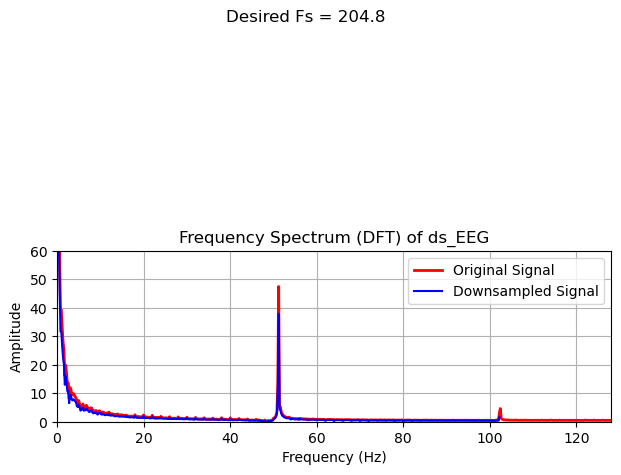

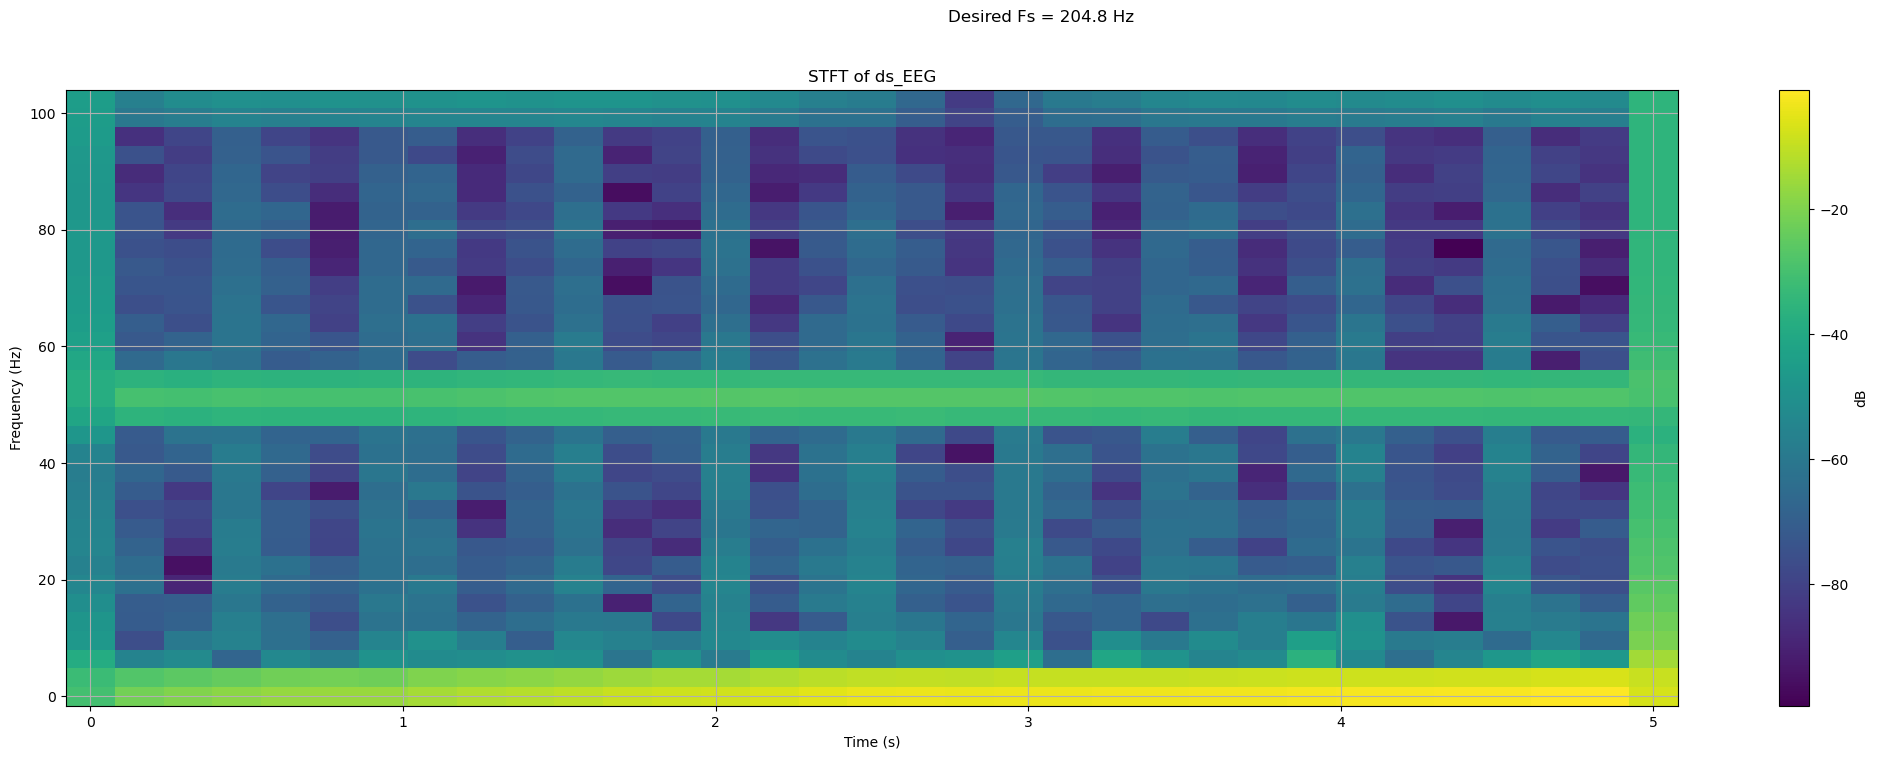

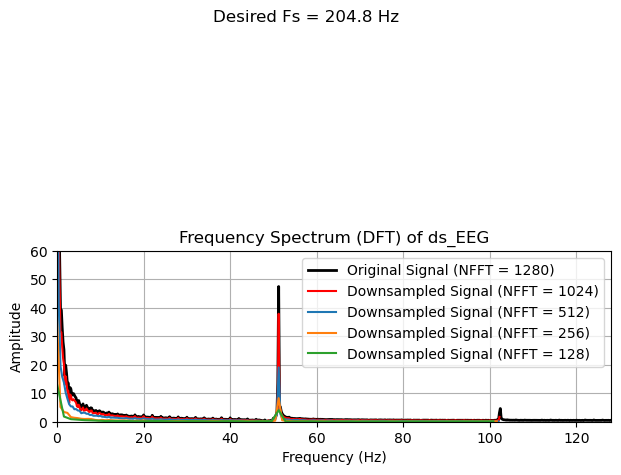

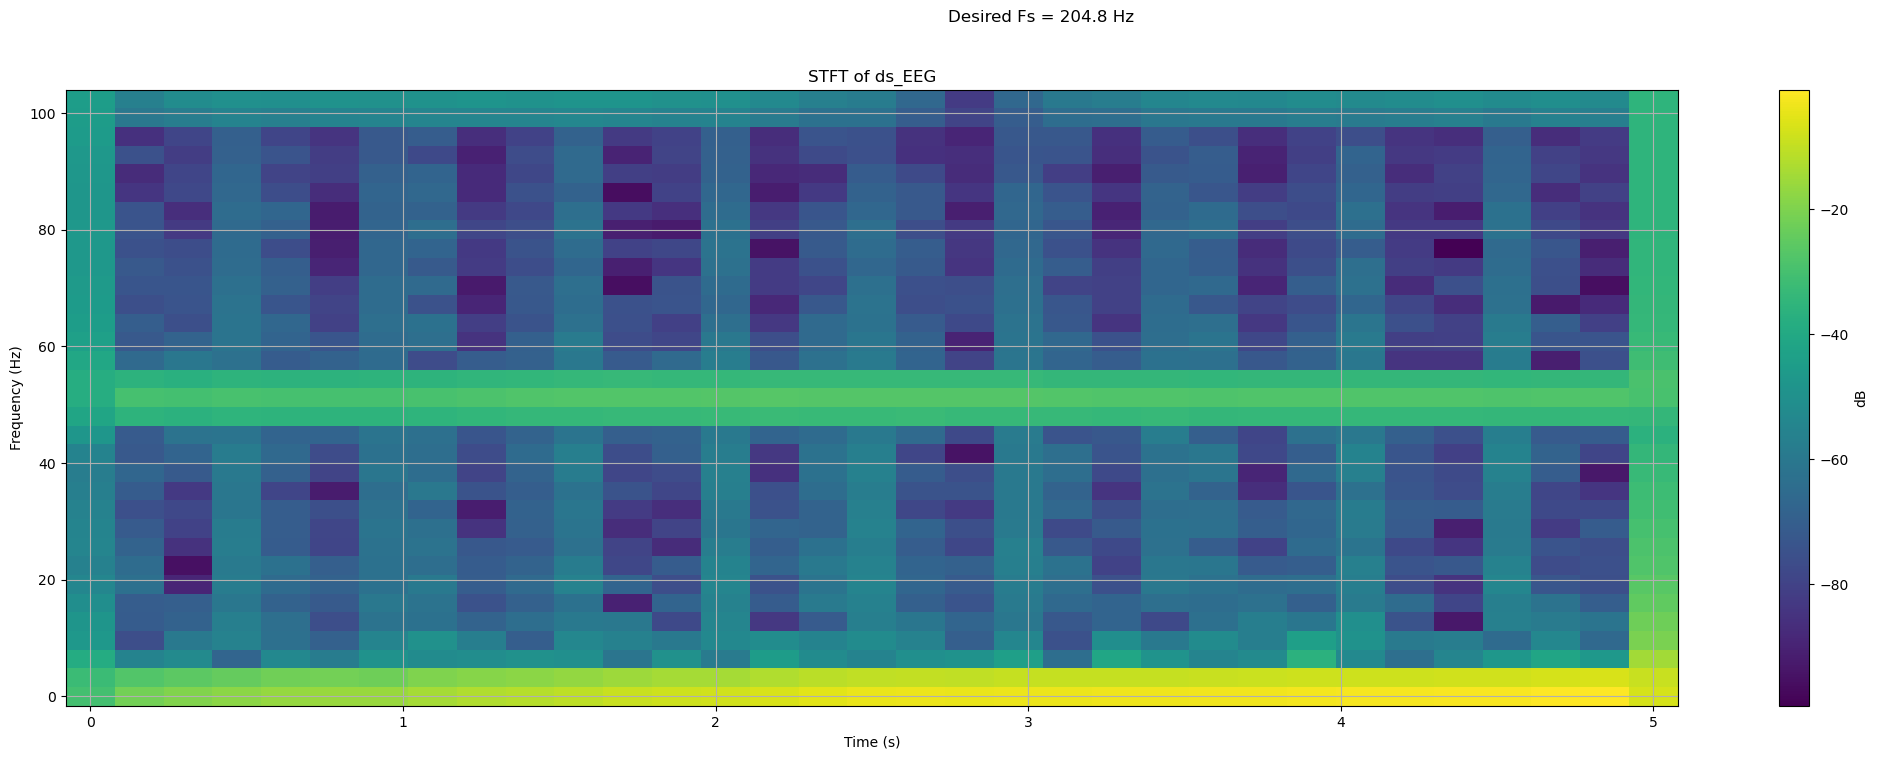

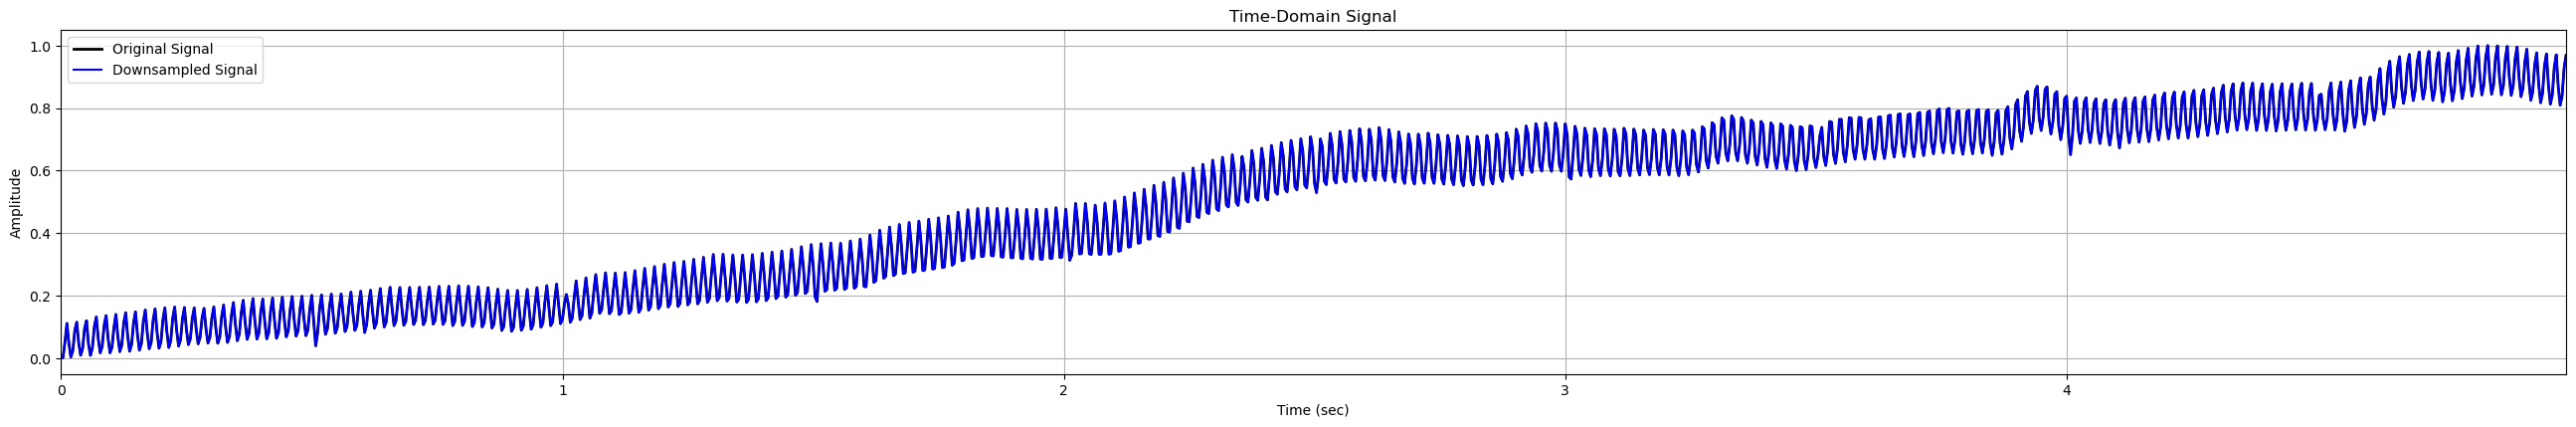

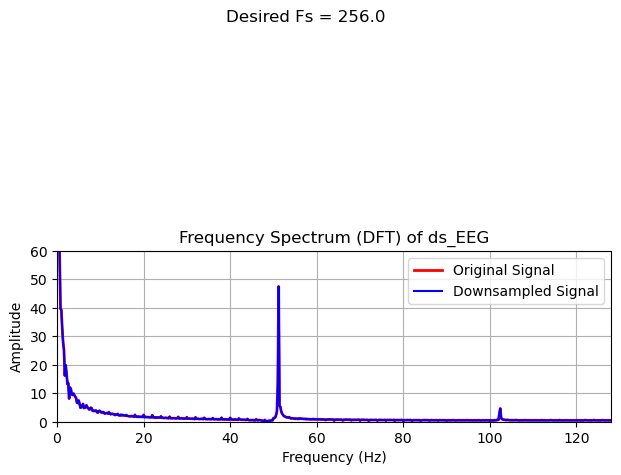

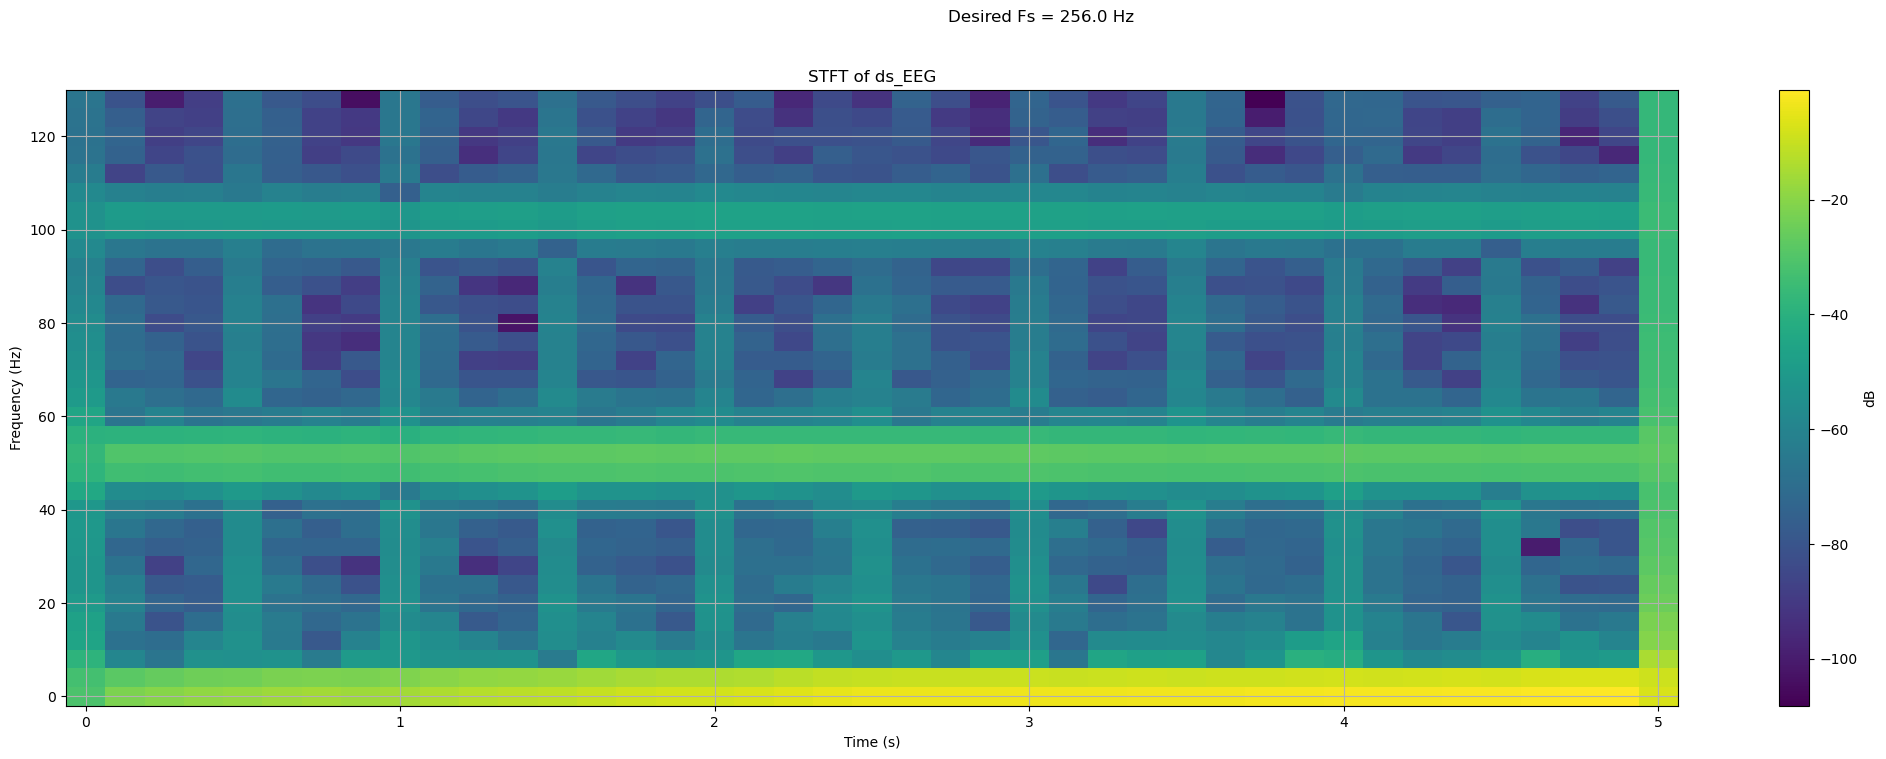

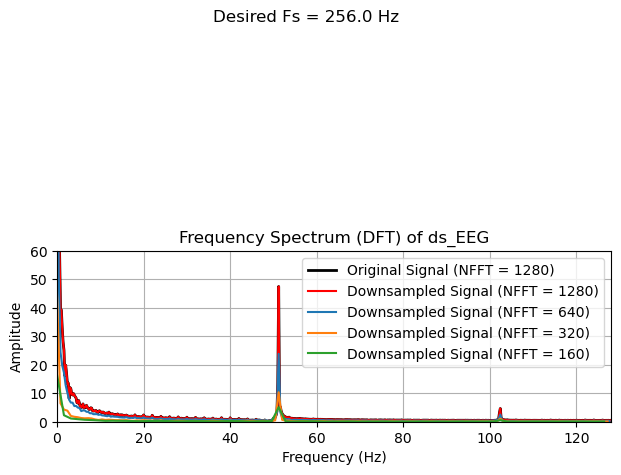

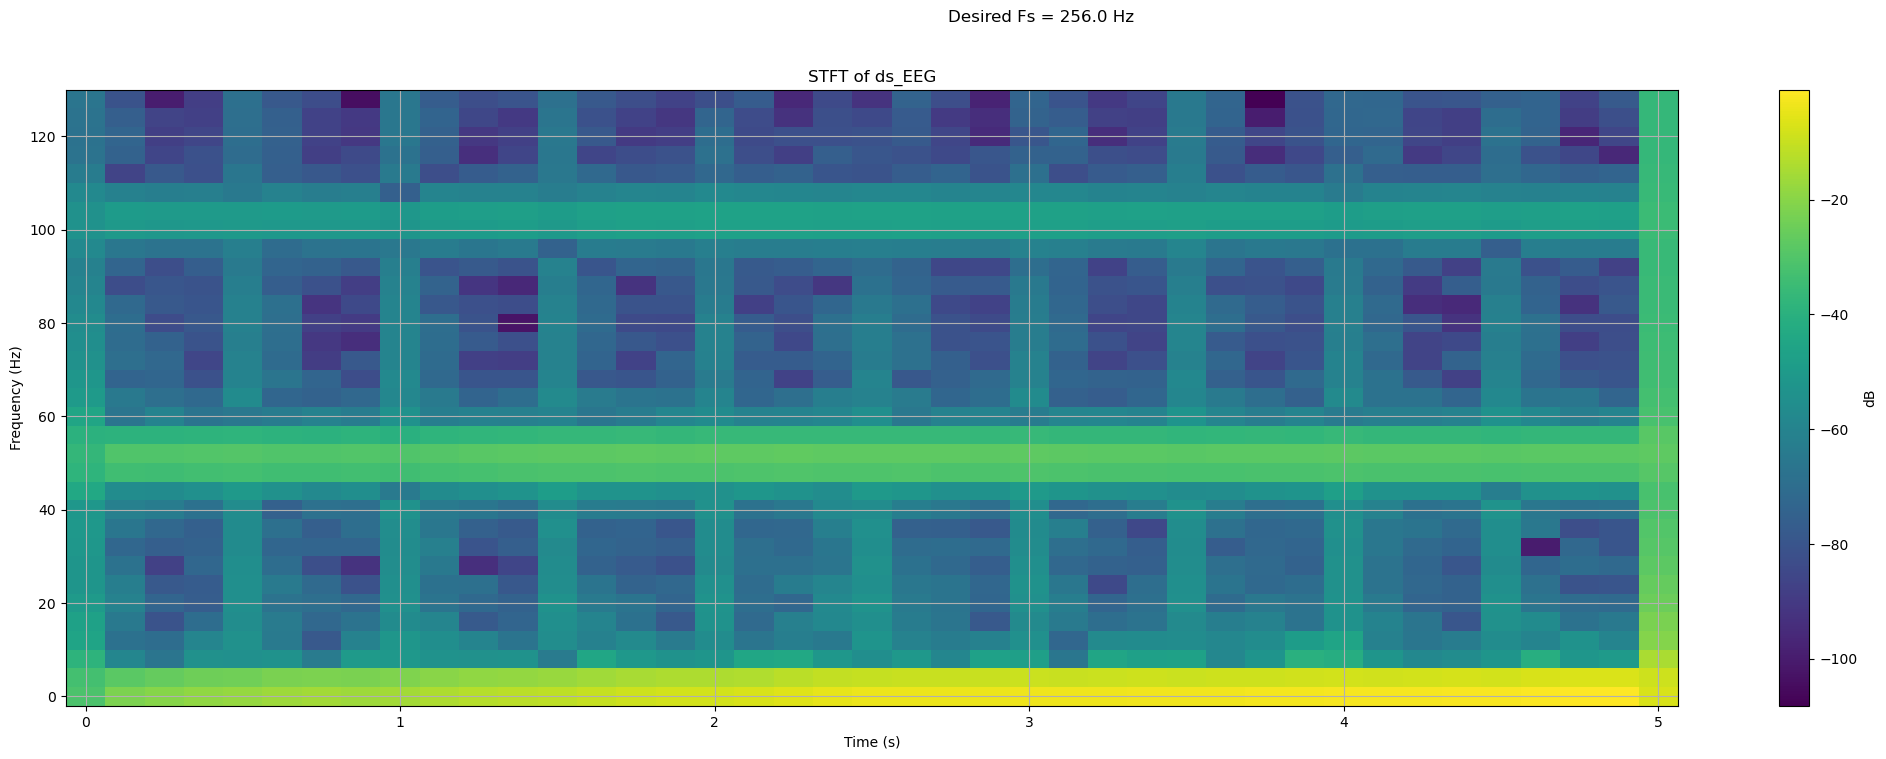

In [46]:
M = [1, 2, 4, 6, 8, 10]
desireds_fs = np.array(M)*fs/10

for desired_fs in desireds_fs:
    # Define the desired lower sampling rate
    t = np.arange(0, 1280) / fs

    # Step 1: Apply a low-pass filter
    # Design a Butterworth low-pass filter
    nyquist = 0.5 * fs
    low_cutoff = 0.4999 * desired_fs
    b, a = butter(3, low_cutoff / nyquist, btype='low')

    # Apply the filter to the original signal
    filtered_signal = lfilter(b, a, signal)

    # Step 2: Downsample the filtered signal
    downsampled_signal = resample(filtered_signal, int(len(filtered_signal) * (desired_fs / fs)),)

    # Step 3: Plot the time signal, frequency spectrum (DFT), and STFT of the downsampled signal
    # Time signal
    plt.figure(figsize=(26, 8))
    plt.subplot(2, 1, 1)
    plt.plot(t, signal, 'k', label="Original Signal", lw=2)
    plt.plot(np.arange(0, len(downsampled_signal)) / desired_fs, downsampled_signal, c='b', label="Downsampled Signal")
    plt.title("Time-Domain Signal")
    plt.xlabel("Time (sec)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.xlim(0, t[-1])
    plt.legend()
    plt.tight_layout()
    plt.show()
    # Frequency Spectrum (DFT) of ds_EEG
    plt.subplot(2, 1, 2)
    dft = fft(signal)
    n = len(signal)
    freq = np.fft.fftfreq(n, 1/fs)
    positive_freq_indices = np.where(freq >= 0)
    plt.plot(freq[positive_freq_indices], np.abs(dft[positive_freq_indices]), 'r', label="Original Signal", lw=2)
    dft_ds_EEG = fft(downsampled_signal)
    freq_ds_EEG = np.fft.fftfreq(len(downsampled_signal), 1 / desired_fs)
    positive_freq_indices = np.where(freq_ds_EEG >= 0)
    plt.plot(freq_ds_EEG[positive_freq_indices], np.abs(dft_ds_EEG[positive_freq_indices]), c='b', label="Downsampled Signal")
    plt.title("Frequency Spectrum (DFT) of ds_EEG")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.suptitle("Desired Fs = {}".format(desired_fs))
    plt.tight_layout()
    plt.legend()
    plt.xlim(0, fs/2)
    plt.ylim(0, 60)
    plt.show()
    # STFT of ds_EEG
    f_ds_EEG, t_ds_EEG, Zxx_ds_EEG = stft(downsampled_signal, fs=desired_fs, nperseg=64)
    plt.figure(figsize=(26, 8))
    plt.pcolormesh(t_ds_EEG, f_ds_EEG, 20 * np.log10(np.abs(Zxx_ds_EEG)))
    plt.title("STFT of ds_EEG")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar(label="dB")
    plt.grid(True)
    plt.suptitle("Desired Fs = {} Hz".format(desired_fs))
    plt.show()

     # Frequency Spectrum (DFT) of ds_EEG
    plt.subplot(2, 1, 2)

    dft = fft(signal)
    freq = np.fft.fftfreq(len(signal), 1/fs)
    positive_freq_indices = np.where(freq >= 0)
    plt.plot(freq[positive_freq_indices], np.abs(dft[positive_freq_indices]), 'k', label="Original Signal (NFFT = {})".format(len(signal)), lw=2)

    dft = fft(downsampled_signal)
    freq = np.fft.fftfreq(len(downsampled_signal), 1/desired_fs)
    positive_freq_indices = np.where(freq >= 0)
    plt.plot(freq[positive_freq_indices], np.abs(dft[positive_freq_indices]), 'r', label="Downsampled Signal (NFFT = {})".format(len(downsampled_signal)), lw=1.5)

    NFFT0 = len(downsampled_signal)
    NFFTs = [NFFT0//2, NFFT0//4, NFFT0//8]

    for NFFT in NFFTs:
        dft_ds_EEG = fft(downsampled_signal, NFFT)
        freq_ds_EEG = np.fft.fftfreq(len(dft_ds_EEG), 1/desired_fs)
        positive_freq_indices = np.where(freq_ds_EEG >= 0)
        plt.plot(freq_ds_EEG[positive_freq_indices], np.abs(dft_ds_EEG[positive_freq_indices]), label="Downsampled Signal (NFFT = {})".format(NFFT))

    plt.title("Frequency Spectrum (DFT) of ds_EEG")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.suptitle("Desired Fs = {} Hz".format(desired_fs))
    plt.tight_layout()
    plt.legend()
    plt.xlim(0, fs/2)
    plt.ylim(0, 60)
    plt.show()

    # STFT of ds_EEG
    f_ds_EEG, t_ds_EEG, Zxx_ds_EEG = stft(downsampled_signal, fs=desired_fs, nperseg=64)
    plt.figure(figsize=(26, 8))
    plt.pcolormesh(t_ds_EEG, f_ds_EEG, 20 * np.log10(np.abs(Zxx_ds_EEG)))
    plt.title("STFT of ds_EEG")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar(label="dB")
    plt.grid(True)
    plt.suptitle("Desired Fs = {} Hz".format(desired_fs))
    plt.show()

    

    

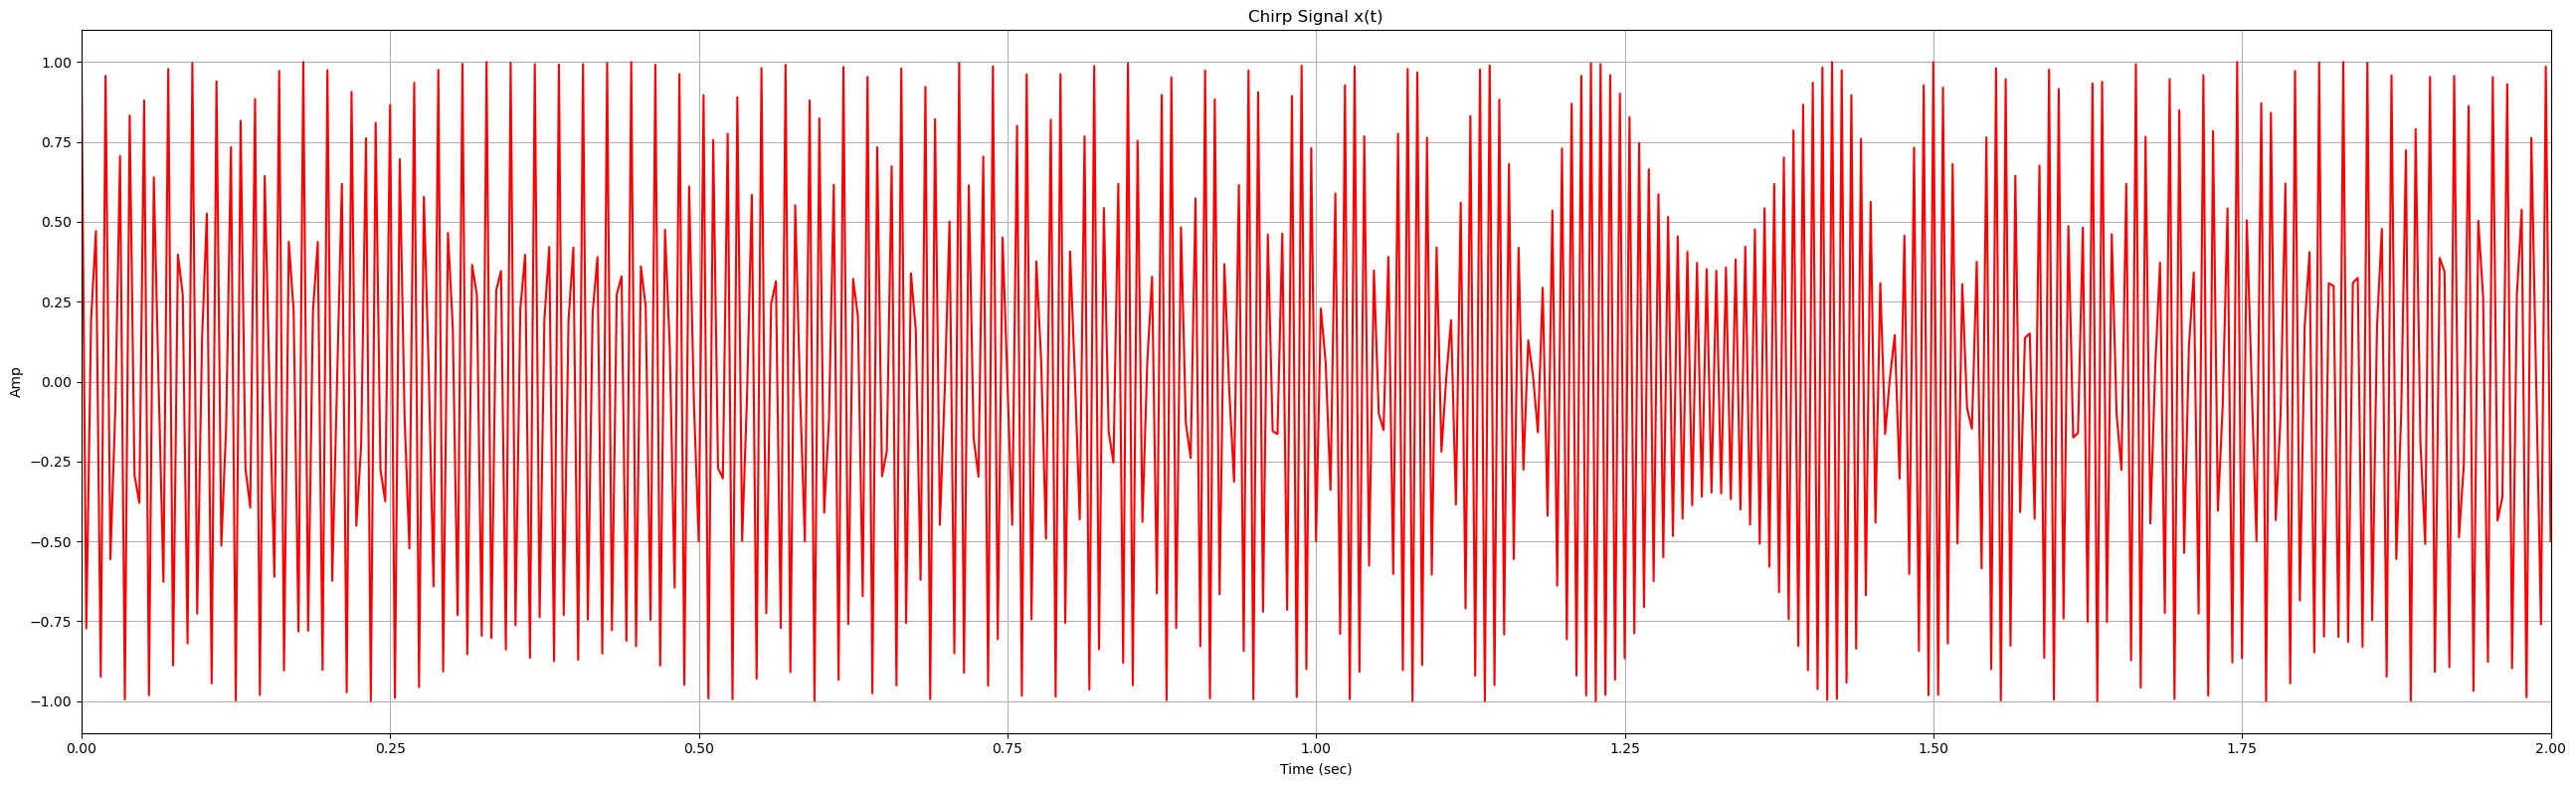

In [ ]:
T = 5.0  # sec
fs = 256  # Hz
t = np.linspace(0, T, int(T * fs), endpoint=False)
f0 = 100 # Hz
beta = 100
f_t = f0 + beta * t**2

x_t = chirp(t, f0=f0, f1=500, t1=T, method='quadratic')
x_t2= np.cos(2 * np.pi * f_t * t)

plt.figure(figsize=(26, 8))
plt.plot(t, x_t, 'r')
plt.xlabel('Time (sec)')
plt.ylabel('Amp')
plt.title('Chirp Signal x(t)')
plt.grid(True)
plt.xlim([0, 2])
plt.tight_layout()
plt.show()

#%% part b
L = 128
fs = 256  # Hz
std = 10 # for gaussian

rectangular_window = get_window('boxcar', L)
triangular_window = get_window('triang', L)
gauss_window = get_window(('gaussian', std), L)
hamming_window = get_window('hamming', L)

t = np.arange(0, L) / fs

plt.figure(figsize=(26, 8))
plt.subplot(2, 2, 1)
plt.plot(t, rectangular_window)
plt.title('Rectangular Window')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 2)
plt.plot(t, triangular_window)
plt.title('Triangular Window')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 3)
plt.plot(t, gauss_window)
plt.title('Gaussian Window')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 4)
plt.plot(t, hamming_window)
plt.title('Hamming Window')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

def normalized_frequency_axis(N):
    return np.arange(N) / N

N = len(x_t)
plt.figure(figsize=(12, 8))
cnt = 1
names = ["Rectangular", "Triangular", "Gaussian", "Hamming"]
for i in [rectangular_window, triangular_window, gauss_window, hamming_window]:
    X = np.fft.fft(i, N)
    X_mag = np.abs(X)

    X_dB = 20 * np.log10(X_mag)

    freq_axis = normalized_frequency_axis(N)

    plt.subplot(2, 2, cnt)
    plt.plot(freq_axis, X_dB)
    plt.title('{} Window Frequency Transform'.format(names[cnt-1]))
    plt.xlabel('Normalized Frequency (x π rads/sample)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True)
    plt.xlim([0, freq_axis[1000]])
    cnt += 1

plt.tight_layout()
plt.show()

#%% part c
noverlap = 0
NFFT = L

plt.figure(figsize=(26, 8))
plt.subplot(2, 2, 1)
f, t, Sxx = spectrogram(x_t, fs, window=rectangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.title('Rectangular Window Frequency Transform')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label="Power/Frequency (dB/Hz)")

plt.subplot(2, 2, 2)
f, t, Sxx = spectrogram(x_t, fs, window=triangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.title('Triangular Window Frequency Transform')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label="Power/Frequency (dB/Hz)")

plt.subplot(2, 2, 3)
f, t, Sxx = spectrogram(x_t, fs, window=gauss_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.title('Gaussian Window Frequency Transform')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label="Power/Frequency (dB/Hz)")

plt.subplot(2, 2, 4)
f, t, Sxx = spectrogram(x_t, fs, window=hamming_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.title('Hamming Window Frequency Transform')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label="Power/Frequency (dB/Hz)")

plt.tight_layout()
plt.show()

#%% part d
noverlaps = [0, 64, 127]
NFFT = L

for noverlap in noverlaps:
    plt.figure(figsize=(26, 8))
    plt.subplot(2, 2, 1)
    f, t, Sxx = spectrogram(x_t, fs, window=rectangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Rectangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 2)
    f, t, Sxx = spectrogram(x_t, fs, window=triangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Triangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 3)
    f, t, Sxx = spectrogram(x_t, fs, window=gauss_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Gaussian Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 4)
    f, t, Sxx = spectrogram(x_t, fs, window=hamming_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Hamming Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.suptitle("N_overlap = {}".format(noverlap))
    plt.tight_layout()
    plt.show()

#%% part e
Ls = [32, 128, 512]

for L in Ls:
    noverlap = L - 1
    NFFT = L
    rectangular_window = get_window('boxcar', L)
    triangular_window = get_window('triang', L)
    gauss_window = get_window(('gaussian', std), L)
    hamming_window = get_window('hamming', L)

    plt.figure(figsize=(26, 8))
    plt.subplot(2, 2, 1)
    f, t, Sxx = spectrogram(x_t, fs, window=rectangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Rectangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 2)
    f, t, Sxx = spectrogram(x_t, fs, window=triangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Triangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 3)
    f, t, Sxx = spectrogram(x_t, fs, window=gauss_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Gaussian Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 4)
    f, t, Sxx = spectrogram(x_t, fs, window=hamming_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Hamming Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.suptitle("L = {}".format(L))
    plt.tight_layout()
    plt.show()

#%% part f
L = 128
NFFTs = [L, 2*L, 4*L]
noverlap = L/2
rectangular_window = get_window('boxcar', L)
triangular_window = get_window('triang', L)
gauss_window = get_window(('gaussian', std), L)
hamming_window = get_window('hamming', L)

for NFFT in NFFTs:
    plt.figure(figsize=(26, 8))
    plt.subplot(2, 2, 1)
    f, t, Sxx = spectrogram(x_t, fs, window=rectangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Rectangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 2)
    f, t, Sxx = spectrogram(x_t, fs, window=triangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Triangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 3)
    f, t, Sxx = spectrogram(x_t, fs, window=gauss_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Gaussian Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 4)
    f, t, Sxx = spectrogram(x_t, fs, window=hamming_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Hamming Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.suptitle("NFFT = {}".format(NFFT))
    plt.tight_layout()
    plt.show()


In [ ]:
# Load the signal from the .mat file
fs = 240 #Hz
t = np.arange(0, 1280) / fs

# a) Autocorrelation method
autocorr = np.correlate(signal, signal, mode='full')
power_autocorr = np.abs(np.fft.fft(autocorr))
freqs = np.fft.fftfreq(len(power_autocorr), 1/fs)
plt.figure()
plt.plot(freqs[:1280], power_autocorr[:1280])
plt.title('Power Spectrum Density (Autocorrelation Method)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.xlim([0, 120])
plt.ylim(0, 1000)

# b) Periodogram method
freqs, power_periodogram = periodogram(signal)
plt.figure()
plt.plot(freqs*fs, power_periodogram, 'r')
plt.title('Power Spectrum Density (Periodogram Method)')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.xlim([0, 120])
plt.ylim(0, 6)

# c) Welch method
freqs, power_welch = welch(signal)
plt.figure()
plt.plot(freqs*fs, power_welch, 'g')
plt.title('Power Spectrum Density (Welch Method)')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.xlim([0, 120])
plt.show()